In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from CartPole_ import CartPole
from CartPoleNoise_ import CartPoleGaussianNoisyDyn, CartPoleGaussianNoisyObs, CartPoleGaussianNoisyObsDyn

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'image.cmap':'jet'
})

from NonLinearObserver_ import NonLinearObserver
from NonLinearController_ import NonLinearController

from shared import get_initial_states, plot_rollout, np_to_string, get_scan_states_ranges, plot_actual_and_predicted_states_contour

In [3]:
# Task 2.4

In [9]:
target = CartPole(False)


In [5]:
# Fit non linear controller

In [6]:
controller = NonLinearController.get_non_linear_controller()
controller.get_params()


(array([[  9.74199032,   6.04785066,  -3.06948853,  -9.72675674],
        [ -2.77179513,  -6.42368332,   1.18036678,   4.30898996],
        [ -7.41678316,   1.0414684 ,  -1.15882005,  -4.44469518],
        [  0.09010693,  -1.40749903,   2.40975771,   9.62807349],
        [  3.68760195,   3.28951828,   0.61116735,  14.27837192],
        [ -8.82678414,  -4.16372206,  -2.1106579 ,  -1.64925291],
        [ -1.04929665,   8.29288503,   1.83768189,   1.78455854],
        [  6.45699304,  -9.17681804,  -0.19097709, -14.1792874 ],
        [  5.84045067,   2.19989603,   2.05664531,  -2.72860751],
        [ -1.6436561 ,  -0.27104175,  -0.75662087,  11.31498576],
        [ -8.17264592,   7.19411053,   0.0478013 , -11.44283792],
        [  4.32257146,  -5.2554531 ,  -1.88783479,   2.62209803],
        [  1.97295228,   9.63686185,  -1.32869679,   7.22134195],
        [ -5.51053509,  -7.81575369,   3.02448817,  -8.71309949],
        [ -4.6182695 ,   4.64085396,  -2.45703431,   8.84158024],
        [ 

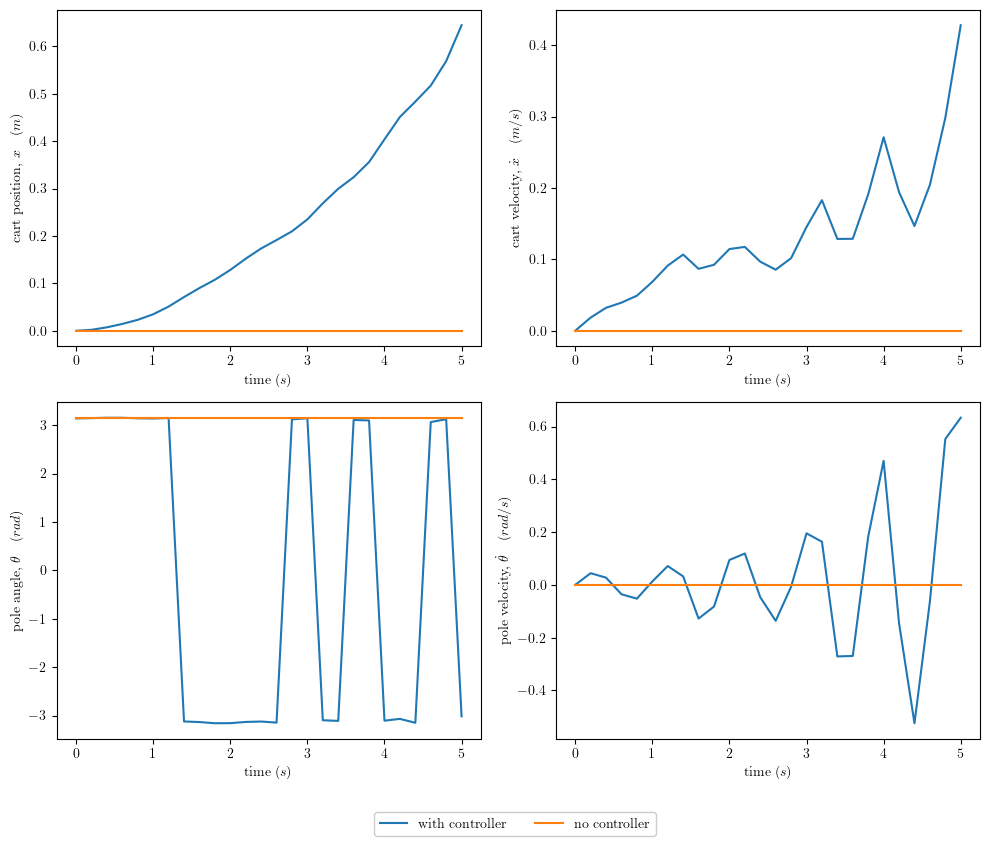

In [12]:
# Start with a unoptimized controller and see roll out from (0, 0, 0, 0) for 5 seconds

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

s0 = np.array([0, 0, np.pi, 0, 0])
x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=5)
x_no_controller, y_no_controller = target.simulate_with_feedback(state=s0, remap=True, controller=None, time=5)

plot_rollout(x, y, axs, fig, label='with controller')
plot_rollout(x_no_controller, y_no_controller, axs, fig, label='no controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)


In [13]:
# Now optimize the controller by considering loss function from stable eq for 3 seconds

from optimizer import Optimizer

optimizer = Optimizer()

s0 = np.array([0, 0, np.pi, 0, 0])
omega0 = controller.omega


In [18]:
omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega0, verbose=False, loss_func=1, time=10, remap=True)
controller.omega = omega_opt 
controller.omega

array([-33.81497418,  36.91271346,  29.29920129, -23.28826012,
       -51.76788123,   1.56750728,  17.3329728 , -54.78581875,
         2.587217  , -69.74061624, -33.09364594,  55.67403655,
         2.73820175,   1.02658167,  94.04567126,  -2.43143245])

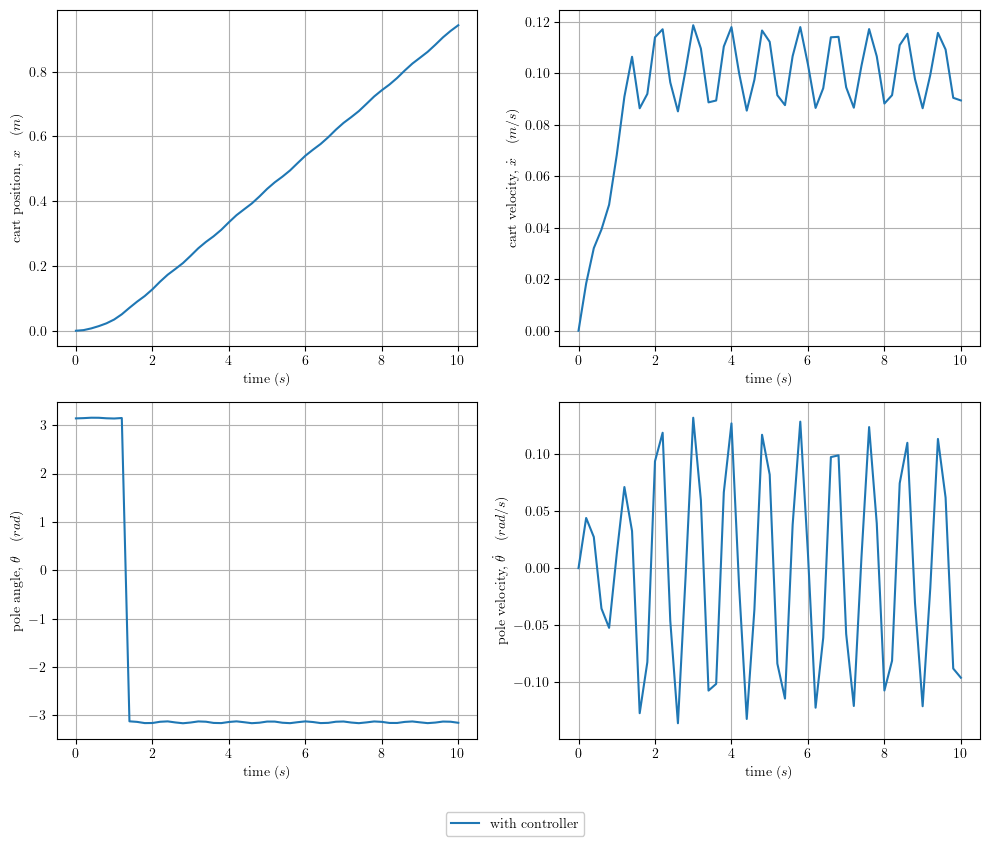

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

s0 = np.array([0, 0, np.pi, 0, 0])
x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

In [23]:
controller = NonLinearController.get_non_linear_controller()
controller.get_params()

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega0, verbose=True, loss_func=2, time=10, remap=True)
controller.omega = omega_opt 
controller.omega

Iter 679: [1.00115625 1.00803982 0.99988859 1.0128194  1.0064318  1.00392129
 1.01078289 0.9926512  1.00990761 0.99088918 0.9941732  1.00221312
 1.01182317 1.01551009 0.99037733 0.99424059]
Iter 680: [1.00115625 1.00803982 0.99988859 1.0128194  1.0064318  1.00392129
 1.01078289 0.9926512  1.00990761 0.99088918 0.9941732  1.00221312
 1.01182317 1.01551009 0.99037733 0.99424059]
Iter 681: [1.00115625 1.00803982 0.99988859 1.0128194  1.0064318  1.00392129
 1.01078289 0.9926512  1.00990761 0.99088918 0.9941732  1.00221312
 1.01182317 1.01551009 0.99037733 0.99424059]
Iter 682: [1.00115625 1.00803982 0.99988859 1.0128194  1.0064318  1.00392129
 1.01078289 0.9926512  1.00990761 0.99088918 0.9941732  1.00221312
 1.01182317 1.01551009 0.99037733 0.99424059]
Iter 683: [1.00115625 1.00803982 0.99988859 1.0128194  1.0064318  1.00392129
 1.01078289 0.9926512  1.00990761 0.99088918 0.9941732  1.00221312
 1.01182317 1.01551009 0.99037733 0.99424059]
Iter 684: [1.00438264 1.01128839 1.00311088 1.0160

Iter 781: [1.01968243 1.02028763 0.99590224 1.03743302 1.0197081  1.02808105
 1.01317945 0.98300489 0.99933919 1.00024079 0.9754713  1.00209442
 1.02103322 1.0133839  0.9929152  0.98460317]
Iter 782: [1.02430191 1.02091782 1.00159784 0.99342265 1.02442024 1.04747163
 1.02072881 0.98145282 1.00033339 1.00562918 0.96818422 1.00129781
 1.02260914 1.01338379 0.9976115  0.98545652]
Iter 783: [1.02430191 1.02091782 1.00159784 0.99342265 1.02442024 1.04747163
 1.02072881 0.98145282 1.00033339 1.00562918 0.96818422 1.00129781
 1.02260914 1.01338379 0.9976115  0.98545652]
Iter 784: [1.02430191 1.02091782 1.00159784 0.99342265 1.02442024 1.04747163
 1.02072881 0.98145282 1.00033339 1.00562918 0.96818422 1.00129781
 1.02260914 1.01338379 0.9976115  0.98545652]
Iter 785: [1.02430191 1.02091782 1.00159784 0.99342265 1.02442024 1.04747163
 1.02072881 0.98145282 1.00033339 1.00562918 0.96818422 1.00129781
 1.02260914 1.01338379 0.9976115  0.98545652]
Iter 786: [1.02430191 1.02091782 1.00159784 0.9934

Iter 866: [1.02053955 1.01877305 0.99742437 1.0270785  1.02330854 1.03113912
 1.01615227 0.98438844 1.00009388 1.00366079 0.97398165 0.99842382
 1.02269086 1.01337977 0.99296205 0.98561624]
Iter 867: [1.02053955 1.01877305 0.99742437 1.0270785  1.02330854 1.03113912
 1.01615227 0.98438844 1.00009388 1.00366079 0.97398165 0.99842382
 1.02269086 1.01337977 0.99296205 0.98561624]
Iter 868: [1.02053955 1.01877305 0.99742437 1.0270785  1.02330854 1.03113912
 1.01615227 0.98438844 1.00009388 1.00366079 0.97398165 0.99842382
 1.02269086 1.01337977 0.99296205 0.98561624]
Iter 869: [1.02053955 1.01877305 0.99742437 1.0270785  1.02330854 1.03113912
 1.01615227 0.98438844 1.00009388 1.00366079 0.97398165 0.99842382
 1.02269086 1.01337977 0.99296205 0.98561624]
Iter 870: [1.02053955 1.01877305 0.99742437 1.0270785  1.02330854 1.03113912
 1.01615227 0.98438844 1.00009388 1.00366079 0.97398165 0.99842382
 1.02269086 1.01337977 0.99296205 0.98561624]
Iter 871: [1.02053955 1.01877305 0.99742437 1.0270

Iter 923: [1.02094929 1.01867073 0.99699308 1.02426452 1.02316671 1.03288153
 1.01655016 0.98413681 1.00028139 1.00331051 0.9751816  0.99636057
 1.02403879 1.01337978 0.99503191 0.9858558 ]
Iter 924: [1.02094929 1.01867073 0.99699308 1.02426452 1.02316671 1.03288153
 1.01655016 0.98413681 1.00028139 1.00331051 0.9751816  0.99636057
 1.02403879 1.01337978 0.99503191 0.9858558 ]
Iter 925: [1.02094929 1.01867073 0.99699308 1.02426452 1.02316671 1.03288153
 1.01655016 0.98413681 1.00028139 1.00331051 0.9751816  0.99636057
 1.02403879 1.01337978 0.99503191 0.9858558 ]
Iter 926: [1.02094929 1.01867073 0.99699308 1.02426452 1.02316671 1.03288153
 1.01655016 0.98413681 1.00028139 1.00331051 0.9751816  0.99636057
 1.02403879 1.01337978 0.99503191 0.9858558 ]
Iter 927: [1.02094929 1.01867073 0.99699308 1.02426452 1.02316671 1.03288153
 1.01655016 0.98413681 1.00028139 1.00331051 0.9751816  0.99636057
 1.02403879 1.01337978 0.99503191 0.9858558 ]
Iter 928: [1.02094929 1.01867073 0.99699308 1.0242

Iter 984: [1.01534149 1.02592927 0.99239722 1.02655292 1.01749629 1.03093905
 1.01488151 0.97268719 1.00037199 0.99746334 0.98700455 1.00607289
 1.02295409 1.01338239 1.00189963 0.98497807]
Iter 985: [1.01534149 1.02592927 0.99239722 1.02655292 1.01749629 1.03093905
 1.01488151 0.97268719 1.00037199 0.99746334 0.98700455 1.00607289
 1.02295409 1.01338239 1.00189963 0.98497807]
Iter 986: [1.01534149 1.02592927 0.99239722 1.02655292 1.01749629 1.03093905
 1.01488151 0.97268719 1.00037199 0.99746334 0.98700455 1.00607289
 1.02295409 1.01338239 1.00189963 0.98497807]
Iter 987: [1.01534149 1.02592927 0.99239722 1.02655292 1.01749629 1.03093905
 1.01488151 0.97268719 1.00037199 0.99746334 0.98700455 1.00607289
 1.02295409 1.01338239 1.00189963 0.98497807]
Iter 988: [1.01534149 1.02592927 0.99239722 1.02655292 1.01749629 1.03093905
 1.01488151 0.97268719 1.00037199 0.99746334 0.98700455 1.00607289
 1.02295409 1.01338239 1.00189963 0.98497807]
Iter 989: [1.01534149 1.02592927 0.99239722 1.0265

Iter 1050: [0.96292173 1.08369554 1.02466776 0.99664502 0.94248456 1.02958928
 1.03174784 0.88315452 1.00222863 0.89668324 0.95506079 1.09104189
 1.02269574 1.01340359 1.1296798  0.97879084]
Iter 1051: [0.96292173 1.08369554 1.02466776 0.99664502 0.94248456 1.02958928
 1.03174784 0.88315452 1.00222863 0.89668324 0.95506079 1.09104189
 1.02269574 1.01340359 1.1296798  0.97879084]
Iter 1052: [0.96292173 1.08369554 1.02466776 0.99664502 0.94248456 1.02958928
 1.03174784 0.88315452 1.00222863 0.89668324 0.95506079 1.09104189
 1.02269574 1.01340359 1.1296798  0.97879084]
Iter 1053: [0.96292173 1.08369554 1.02466776 0.99664502 0.94248456 1.02958928
 1.03174784 0.88315452 1.00222863 0.89668324 0.95506079 1.09104189
 1.02269574 1.01340359 1.1296798  0.97879084]
Iter 1054: [0.9548568  1.09552199 1.03189936 0.98050315 0.92433864 1.03593964
 1.03910064 0.86277422 1.00362938 0.86411271 0.94974008 1.10112977
 1.02754025 1.01340835 1.17369299 0.9787368 ]
Iter 1055: [0.9548568  1.09552199 1.03189936 

Iter 1162: [ 0.0857158   1.972441    1.8290542   0.33353141 -0.41106817  1.0579289
  1.48115931 -0.49545411  1.04321732 -0.94113429 -0.0782592   2.459423
  1.07759198  1.0137309   3.54521201  0.89538753]
Iter 1163: [-0.0506808   2.12319898  1.94307411  0.20027539 -0.63523351  1.08042636
  1.55645117 -0.73405543  1.05205083 -1.25356773 -0.20701986  2.66984701
  1.09436506  1.01378715  3.96760703  0.8836172 ]
Iter 1164: [-0.0506808   2.12319898  1.94307411  0.20027539 -0.63523351  1.08042636
  1.55645117 -0.73405543  1.05205083 -1.25356773 -0.20701986  2.66984701
  1.09436506  1.01378715  3.96760703  0.8836172 ]
Iter 1165: [-0.0506808   2.12319898  1.94307411  0.20027539 -0.63523351  1.08042636
  1.55645117 -0.73405543  1.05205083 -1.25356773 -0.20701986  2.66984701
  1.09436506  1.01378715  3.96760703  0.8836172 ]
Iter 1166: [-0.0506808   2.12319898  1.94307411  0.20027539 -0.63523351  1.08042636
  1.55645117 -0.73405543  1.05205083 -1.25356773 -0.20701986  2.66984701
  1.09436506  1.01

Iter 1270: [-14.7880142   17.1863432   14.63844523 -10.49077732 -23.09895885
   1.40822685   8.73767519 -24.11164615   1.72762054 -31.53603024
 -16.01165885  25.7579306    1.88147816   1.01932948  43.76413455
  -0.545888  ]
Iter 1271: [-14.7880142   17.1863432   14.63844523 -10.49077732 -23.09895885
   1.40822685   8.73767519 -24.11164615   1.72762054 -31.53603024
 -16.01165885  25.7579306    1.88147816   1.01932948  43.76413455
  -0.545888  ]
Iter 1272: [-14.7880142   17.1863432   14.63844523 -10.49077732 -23.09895885
   1.40822685   8.73767519 -24.11164615   1.72762054 -31.53603024
 -16.01165885  25.7579306    1.88147816   1.01932948  43.76413455
  -0.545888  ]
Iter 1273: [-14.7880142   17.1863432   14.63844523 -10.49077732 -23.09895885
   1.40822685   8.73767519 -24.11164615   1.72762054 -31.53603024
 -16.01165885  25.7579306    1.88147816   1.01932948  43.76413455
  -0.545888  ]
Iter 1274: [-14.7880142   17.1863432   14.63844523 -10.49077732 -23.09895885
   1.40822685   8.73767519 

Iter 1323: [-16.54148695  18.99075404  16.07027338 -11.71607272 -25.75630872
   1.43478136   9.56146774 -26.91488266   1.80745698 -35.09868366
 -17.74112328  28.50886376   1.96841721   1.01999315  48.44942721
  -0.7176776 ]
Iter 1324: [-16.54148695  18.99075404  16.07027338 -11.71607272 -25.75630872
   1.43478136   9.56146774 -26.91488266   1.80745698 -35.09868366
 -17.74112328  28.50886376   1.96841721   1.01999315  48.44942721
  -0.7176776 ]
Iter 1325: [-16.54148695  18.99075404  16.07027338 -11.71607272 -25.75630872
   1.43478136   9.56146774 -26.91488266   1.80745698 -35.09868366
 -17.74112328  28.50886376   1.96841721   1.01999315  48.44942721
  -0.7176776 ]
Iter 1326: [-17.09760763  19.53818778  16.5480137  -12.05589292 -26.57184766
   1.41224368   9.81382999 -27.7567745    1.82835776 -36.17505052
 -18.35496176  29.38178143   1.98299252   1.02019331  49.84709836
  -0.7740449 ]
Iter 1327: [-17.09760763  19.53818778  16.5480137  -12.05589292 -26.57184766
   1.41224368   9.81382999 

Iter 1385: [-21.69025058  24.24273666  20.32946855 -15.22643106 -33.50140342
   1.45295185  11.95947545 -35.05436024   2.03198836 -45.446008
 -22.96558584  36.59571861   2.19143787   1.02192232  62.01769603
  -1.22768508]
Iter 1386: [-21.69025058  24.24273666  20.32946855 -15.22643106 -33.50140342
   1.45295185  11.95947545 -35.05436024   2.03198836 -45.446008
 -22.96558584  36.59571861   2.19143787   1.02192232  62.01769603
  -1.22768508]
Iter 1387: [-22.59620517  25.17348904  21.06033398 -15.84272015 -34.86383935
   1.45833955  12.37587845 -36.4988308    2.07207813 -47.26819758
 -23.84606363  38.01943908   2.23118413   1.0222644   64.40765087
  -1.31752059]
Iter 1388: [-22.59620517  25.17348904  21.06033398 -15.84272015 -34.86383935
   1.45833955  12.37587845 -36.4988308    2.07207813 -47.26819758
 -23.84606363  38.01943908   2.23118413   1.0222644   64.40765087
  -1.31752059]
Iter 1389: [-22.59620517  25.17348904  21.06033398 -15.84272015 -34.86383935
   1.45833955  12.37587845 -36.

Iter 1450: [-26.2496528   28.91506902  23.96183786 -18.2589963  -40.33224552
   1.45001282  14.03103798 -42.30194213   2.23062962 -54.54113871
 -27.32286184  43.76059896   2.37994434   1.02363835  73.95140453
  -1.68145091]
Iter 1451: [-26.2496528   28.91506902  23.96183786 -18.2589963  -40.33224552
   1.45001282  14.03103798 -42.30194213   2.23062962 -54.54113871
 -27.32286184  43.76059896   2.37994434   1.02363835  73.95140453
  -1.68145091]
Iter 1452: [-26.2496528   28.91506902  23.96183786 -18.2589963  -40.33224552
   1.45001282  14.03103798 -42.30194213   2.23062962 -54.54113871
 -27.32286184  43.76059896   2.37994434   1.02363835  73.95140453
  -1.68145091]
Iter 1453: [-26.2496528   28.91506902  23.96183786 -18.2589963  -40.33224552
   1.45001282  14.03103798 -42.30194213   2.23062962 -54.54113871
 -27.32286184  43.76059896   2.37994434   1.02363835  73.95140453
  -1.68145091]
Iter 1454: [-26.2496528   28.91506902  23.96183786 -18.2589963  -40.33224552
   1.45001282  14.03103798 

Iter 1508: [-27.77886494  30.49410543  25.12756165 -19.25843578 -42.62111889
   1.44841039  14.71056149 -44.75501639   2.29800911 -57.57887022
 -28.67900343  46.16528997   2.44257122   1.02421838  77.94513091
  -1.83401006]
Iter 1509: [-27.77886494  30.49410543  25.12756165 -19.25843578 -42.62111889
   1.44841039  14.71056149 -44.75501639   2.29800911 -57.57887022
 -28.67900343  46.16528997   2.44257122   1.02421838  77.94513091
  -1.83401006]
Iter 1510: [-27.83671328  30.54673527  25.18941035 -19.29281407 -42.7034382
   1.44334136  14.73845183 -44.83433391   2.29958477 -57.68806998
 -28.76890098  46.25603791   2.44278785   1.02423749  78.0831905
  -1.84006671]
Iter 1511: [-27.83671328  30.54673527  25.18941035 -19.29281407 -42.7034382
   1.44334136  14.73845183 -44.83433391   2.29958477 -57.68806998
 -28.76890098  46.25603791   2.44278785   1.02423749  78.0831905
  -1.84006671]
Iter 1512: [-27.83671328  30.54673527  25.18941035 -19.29281407 -42.7034382
   1.44334136  14.73845183 -44.8

Iter 1617: [-30.72675402  33.59970049  27.23006393 -21.21707134 -47.07117421
   1.48893043  16.00239243 -49.60026793   2.43611273 -63.4921033
 -30.97665312  50.80384349   2.58156477   1.02536113  85.76051729
  -2.12593712]
Iter 1618: [-30.72675402  33.59970049  27.23006393 -21.21707134 -47.07117421
   1.48893043  16.00239243 -49.60026793   2.43611273 -63.4921033
 -30.97665312  50.80384349   2.58156477   1.02536113  85.76051729
  -2.12593712]
Iter 1619: [-30.72675402  33.59970049  27.23006393 -21.21707134 -47.07117421
   1.48893043  16.00239243 -49.60026793   2.43611273 -63.4921033
 -30.97665312  50.80384349   2.58156477   1.02536113  85.76051729
  -2.12593712]
Iter 1620: [-30.72675402  33.59970049  27.23006393 -21.21707134 -47.07117421
   1.48893043  16.00239243 -49.60026793   2.43611273 -63.4921033
 -30.97665312  50.80384349   2.58156477   1.02536113  85.76051729
  -2.12593712]
Iter 1621: [-30.72675402  33.59970049  27.23006393 -21.21707134 -47.07117421
   1.48893043  16.00239243 -49.

Iter 1671: [-31.56548781  34.47541386  27.82988751 -21.7517401  -48.32480522
   1.48767202  16.36294478 -50.96361121   2.47366823 -65.15090801
 -31.64101012  52.12447903   2.61534103   1.02568289  87.94493973
  -2.20993652]
Iter 1672: [-31.56548781  34.47541386  27.82988751 -21.7517401  -48.32480522
   1.48767202  16.36294478 -50.96361121   2.47366823 -65.15090801
 -31.64101012  52.12447903   2.61534103   1.02568289  87.94493973
  -2.20993652]
Iter 1673: [-31.56548781  34.47541386  27.82988751 -21.7517401  -48.32480522
   1.48767202  16.36294478 -50.96361121   2.47366823 -65.15090801
 -31.64101012  52.12447903   2.61534103   1.02568289  87.94493973
  -2.20993652]
Iter 1674: [-31.56548781  34.47541386  27.82988751 -21.7517401  -48.32480522
   1.48767202  16.36294478 -50.96361121   2.47366823 -65.15090801
 -31.64101012  52.12447903   2.61534103   1.02568289  87.94493973
  -2.20993652]
Iter 1675: [-31.56548781  34.47541386  27.82988751 -21.7517401  -48.32480522
   1.48767202  16.36294478 

Iter 1721: [-32.13643347  35.08114886  28.22127736 -22.12554703 -49.18650896
   1.49543919  16.6081634  -51.90974446   2.50062871 -66.29413884
 -32.05415194  53.02407499   2.64183095   1.0259058   89.45693879
  -2.26668721]
Iter 1722: [-32.13643347  35.08114886  28.22127736 -22.12554703 -49.18650896
   1.49543919  16.6081634  -51.90974446   2.50062871 -66.29413884
 -32.05415194  53.02407499   2.64183095   1.0259058   89.45693879
  -2.26668721]
Iter 1723: [-32.13643347  35.08114886  28.22127736 -22.12554703 -49.18650896
   1.49543919  16.6081634  -51.90974446   2.50062871 -66.29413884
 -32.05415194  53.02407499   2.64183095   1.0259058   89.45693879
  -2.26668721]
Iter 1724: [-32.13643347  35.08114886  28.22127736 -22.12554703 -49.18650896
   1.49543919  16.6081634  -51.90974446   2.50062871 -66.29413884
 -32.05415194  53.02407499   2.64183095   1.0259058   89.45693879
  -2.26668721]
Iter 1725: [-32.13643347  35.08114886  28.22127736 -22.12554703 -49.18650896
   1.49543919  16.6081634  

Iter 1836: [-32.9474647   35.94973247  28.76109989 -22.66179346 -50.41704989
   1.51256592  16.9551189  -53.26883775   2.53995253 -67.92819959
 -32.60489709  54.30307569   2.68170056   1.02622567  91.62289907
  -2.34709879]
Iter 1837: [-32.9474647   35.94973247  28.76109989 -22.66179346 -50.41704989
   1.51256592  16.9551189  -53.26883775   2.53995253 -67.92819959
 -32.60489709  54.30307569   2.68170056   1.02622567  91.62289907
  -2.34709879]
Iter 1838: [-32.9474647   35.94973247  28.76109989 -22.66179346 -50.41704989
   1.51256592  16.9551189  -53.26883775   2.53995253 -67.92819959
 -32.60489709  54.30307569   2.68170056   1.02622567  91.62289907
  -2.34709879]
Iter 1839: [-32.9474647   35.94973247  28.76109989 -22.66179346 -50.41704989
   1.51256592  16.9551189  -53.26883775   2.53995253 -67.92819959
 -32.60489709  54.30307569   2.68170056   1.02622567  91.62289907
  -2.34709879]
Iter 1840: [-32.9474647   35.94973247  28.76109989 -22.66179346 -50.41704989
   1.51256592  16.9551189  

Iter 1891: [-33.2046251   36.22853782  28.92807779 -22.83658278 -50.81081685
   1.52147969  17.06571592 -53.70607175   2.55291672 -68.45264531
 -32.76906225  54.7090536    2.69561648   1.02632848  92.32012761
  -2.37245384]
Iter 1892: [-33.2046251   36.22853782  28.92807779 -22.83658278 -50.81081685
   1.52147969  17.06571592 -53.70607175   2.55291672 -68.45264531
 -32.76906225  54.7090536    2.69561648   1.02632848  92.32012761
  -2.37245384]
Iter 1893: [-33.2046251   36.22853782  28.92807779 -22.83658278 -50.81081685
   1.52147969  17.06571592 -53.70607175   2.55291672 -68.45264531
 -32.76906225  54.7090536    2.69561648   1.02632848  92.32012761
  -2.37245384]
Iter 1894: [-33.2046251   36.22853782  28.92807779 -22.83658278 -50.81081685
   1.52147969  17.06571592 -53.70607175   2.55291672 -68.45264531
 -32.76906225  54.7090536    2.69561648   1.02632848  92.32012761
  -2.37245384]
Iter 1895: [-33.2046251   36.22853782  28.92807779 -22.83658278 -50.81081685
   1.52147969  17.06571592 

Iter 1930: [-33.28866549  36.32158149  28.98139723 -22.89777983 -50.94166355
   1.52684944  17.102628   -53.85255805   2.5574753  -68.62841758
 -32.81879302  54.84184921   2.70108174   1.02636287  92.55490345
  -2.38062311]
Iter 1931: [-33.28866549  36.32158149  28.98139723 -22.89777983 -50.94166355
   1.52684944  17.102628   -53.85255805   2.5574753  -68.62841758
 -32.81879302  54.84184921   2.70108174   1.02636287  92.55490345
  -2.38062311]
Iter 1932: [-33.28866549  36.32158149  28.98139723 -22.89777983 -50.94166355
   1.52684944  17.102628   -53.85255805   2.5574753  -68.62841758
 -32.81879302  54.84184921   2.70108174   1.02636287  92.55490345
  -2.38062311]
Iter 1933: [-33.29176268  36.32437944  28.98313103 -22.89812254 -50.94557384
   1.52603924  17.10347842 -53.85679637   2.55752867 -68.63298092
 -32.82073172  54.84667747   2.7009308    1.02636387  92.56067364
  -2.38096815]
Iter 1934: [-33.29176268  36.32437944  28.98313103 -22.89812254 -50.94557384
   1.52603924  17.10347842 

Iter 2007: [-33.50889735  36.56513644  29.1173644  -23.05371505 -51.28320682
   1.53921956  17.19768944 -54.23598904   2.5692999  -69.08553843
 -32.94247346  55.18980951   2.71487385   1.02645286  93.16550289
  -2.40210322]
Iter 2008: [-33.50889735  36.56513644  29.1173644  -23.05371505 -51.28320682
   1.53921956  17.19768944 -54.23598904   2.5692999  -69.08553843
 -32.94247346  55.18980951   2.71487385   1.02645286  93.16550289
  -2.40210322]
Iter 2009: [-33.50889735  36.56513644  29.1173644  -23.05371505 -51.28320682
   1.53921956  17.19768944 -54.23598904   2.5692999  -69.08553843
 -32.94247346  55.18980951   2.71487385   1.02645286  93.16550289
  -2.40210322]
Iter 2010: [-33.50889735  36.56513644  29.1173644  -23.05371505 -51.28320682
   1.53921956  17.19768944 -54.23598904   2.5692999  -69.08553843
 -32.94247346  55.18980951   2.71487385   1.02645286  93.16550289
  -2.40210322]
Iter 2011: [-33.50889735  36.56513644  29.1173644  -23.05371505 -51.28320682
   1.53921956  17.19768944 

Iter 2046: [-33.56160484  36.62373564  29.14820597 -23.09019858 -51.36496576
   1.54205719  17.22000301 -54.32835137   2.57215171 -69.19456775
 -32.96870376  55.27311272   2.71816744   1.02647451  93.31144274
  -2.40724721]
Iter 2047: [-33.56160484  36.62373564  29.14820597 -23.09019858 -51.36496576
   1.54205719  17.22000301 -54.32835137   2.57215171 -69.19456775
 -32.96870376  55.27311272   2.71816744   1.02647451  93.31144274
  -2.40724721]
Iter 2048: [-33.56160484  36.62373564  29.14820597 -23.09019858 -51.36496576
   1.54205719  17.22000301 -54.32835137   2.57215171 -69.19456775
 -32.96870376  55.27311272   2.71816744   1.02647451  93.31144274
  -2.40724721]
Iter 2049: [-33.56160484  36.62373564  29.14820597 -23.09019858 -51.36496576
   1.54205719  17.22000301 -54.32835137   2.57215171 -69.19456775
 -32.96870376  55.27311272   2.71816744   1.02647451  93.31144274
  -2.40724721]
Iter 2050: [-33.58940436  36.65441749  29.16439389 -23.10876846 -51.40774904
   1.54319656  17.23158466 

Iter 2097: [-33.64208149  36.71331078  29.19385479 -23.14482407 -51.48953709
   1.54606694  17.25357726 -54.46959423   2.57650001 -69.36025876
 -33.00602258  55.40028163   2.72312077   1.02650759  93.53337122
  -2.41511074]
Iter 2098: [-33.64208149  36.71331078  29.19385479 -23.14482407 -51.48953709
   1.54606694  17.25357726 -54.46959423   2.57650001 -69.36025876
 -33.00602258  55.40028163   2.72312077   1.02650759  93.53337122
  -2.41511074]
Iter 2099: [-33.64208149  36.71331078  29.19385479 -23.14482407 -51.48953709
   1.54606694  17.25357726 -54.46959423   2.57650001 -69.36025876
 -33.00602258  55.40028163   2.72312077   1.02650759  93.53337122
  -2.41511074]
Iter 2100: [-33.64208149  36.71331078  29.19385479 -23.14482407 -51.48953709
   1.54606694  17.25357726 -54.46959423   2.57650001 -69.36025876
 -33.00602258  55.40028163   2.72312077   1.02650759  93.53337122
  -2.41511074]
Iter 2101: [-33.64208149  36.71331078  29.19385479 -23.14482407 -51.48953709
   1.54606694  17.25357726 

Iter 2160: [-33.69569866  36.77391478  29.22467245 -23.18416699 -51.57379531
   1.55026177  17.27669308 -54.56540794   2.57957122 -69.47347321
 -33.03084213  55.48506204   2.72696385   1.02653003  93.68542958
  -2.42027915]
Iter 2161: [-33.69569866  36.77391478  29.22467245 -23.18416699 -51.57379531
   1.55026177  17.27669308 -54.56540794   2.57957122 -69.47347321
 -33.03084213  55.48506204   2.72696385   1.02653003  93.68542958
  -2.42027915]
Iter 2162: [-33.70693716  36.78686087  29.23113733 -23.19308878 -51.59176445
   1.55150632  17.28169632 -54.58594208   2.58025866 -69.49787122
 -33.03584843  55.50284719   2.72790137   1.02653484  93.71831499
  -2.42134549]
Iter 2163: [-33.70693716  36.78686087  29.23113733 -23.19308878 -51.59176445
   1.55150632  17.28169632 -54.58594208   2.58025866 -69.49787122
 -33.03584843  55.50284719   2.72790137   1.02653484  93.71831499
  -2.42134549]
Iter 2164: [-33.70693716  36.78686087  29.23113733 -23.19308878 -51.59176445
   1.55150632  17.28169632 

Iter 2236: [-33.75203183  36.83894148  29.25848628 -23.23057425 -51.66442529
   1.55716304  17.30240362 -54.66855615   2.58306456 -69.59718221
 -33.05840727  55.57425231   2.7318619    1.02655419  93.8521234
  -2.42559908]
Iter 2237: [-33.75203183  36.83894148  29.25848628 -23.23057425 -51.66442529
   1.55716304  17.30240362 -54.66855615   2.58306456 -69.59718221
 -33.05840727  55.57425231   2.7318619    1.02655419  93.8521234
  -2.42559908]
Iter 2238: [-33.75203183  36.83894148  29.25848628 -23.23057425 -51.66442529
   1.55716304  17.30240362 -54.66855615   2.58306456 -69.59718221
 -33.05840727  55.57425231   2.7318619    1.02655419  93.8521234
  -2.42559908]
Iter 2239: [-33.75203183  36.83894148  29.25848628 -23.23057425 -51.66442529
   1.55716304  17.30240362 -54.66855615   2.58306456 -69.59718221
 -33.05840727  55.57425231   2.7318619    1.02655419  93.8521234
  -2.42559908]
Iter 2240: [-33.75344084  36.84062946  29.25939644 -23.23197574 -51.66677827
   1.55745232  17.30310916 -54.

Iter 2325: [-33.7879995   36.88128655  29.28188984 -23.26422025 -51.72379769
   1.56341321  17.32004343 -54.73591699   2.58547587 -69.67975891
 -33.07863162  55.63127168   2.73560885   1.02656997  93.96362216
  -2.4289153 ]
Iter 2326: [-33.7879995   36.88128655  29.28188984 -23.26422025 -51.72379769
   1.56341321  17.32004343 -54.73591699   2.58547587 -69.67975891
 -33.07863162  55.63127168   2.73560885   1.02656997  93.96362216
  -2.4289153 ]
Iter 2327: [-33.7879995   36.88128655  29.28188984 -23.26422025 -51.72379769
   1.56341321  17.32004343 -54.73591699   2.58547587 -69.67975891
 -33.07863162  55.63127168   2.73560885   1.02656997  93.96362216
  -2.4289153 ]
Iter 2328: [-33.7879995   36.88128655  29.28188984 -23.26422025 -51.72379769
   1.56341321  17.32004343 -54.73591699   2.58547587 -69.67975891
 -33.07863162  55.63127168   2.73560885   1.02656997  93.96362216
  -2.4289153 ]
Iter 2329: [-33.7879995   36.88128655  29.28188984 -23.26422025 -51.72379769
   1.56341321  17.32004343 

Iter 2409: [-33.80623918  36.902624    29.2938909  -23.28100439 -51.7537884
   1.56641301  17.32895473 -54.7698171    2.58667455 -69.72136443
 -33.08925063  55.66019477   2.73743912   1.02657792  94.01972982
  -2.43060708]
Iter 2410: [-33.80623918  36.902624    29.2938909  -23.28100439 -51.7537884
   1.56641301  17.32895473 -54.7698171    2.58667455 -69.72136443
 -33.08925063  55.66019477   2.73743912   1.02657792  94.01972982
  -2.43060708]
Iter 2411: [-33.80623918  36.902624    29.2938909  -23.28100439 -51.7537884
   1.56641301  17.32895473 -54.7698171    2.58667455 -69.72136443
 -33.08925063  55.66019477   2.73743912   1.02657792  94.01972982
  -2.43060708]
Iter 2412: [-33.80623918  36.902624    29.2938909  -23.28100439 -51.7537884
   1.56641301  17.32895473 -54.7698171    2.58667455 -69.72136443
 -33.08925063  55.66019477   2.73743912   1.02657792  94.01972982
  -2.43060708]
Iter 2413: [-33.80623918  36.902624    29.2938909  -23.28100439 -51.7537884
   1.56641301  17.32895473 -54.7

Iter 2467: [-33.81288251  36.91029891  29.29792535 -23.28652274 -51.76450717
   1.56724604  17.3320099  -54.78198982   2.5870873  -69.73600698
 -33.09258426  55.67072195   2.73801956   1.02658077  94.0394614
  -2.43123475]
Iter 2468: [-33.81288251  36.91029891  29.29792535 -23.28652274 -51.76450717
   1.56724604  17.3320099  -54.78198982   2.5870873  -69.73600698
 -33.09258426  55.67072195   2.73801956   1.02658077  94.0394614
  -2.43123475]
Iter 2469: [-33.81288251  36.91029891  29.29792535 -23.28652274 -51.76450717
   1.56724604  17.3320099  -54.78198982   2.5870873  -69.73600698
 -33.09258426  55.67072195   2.73801956   1.02658077  94.0394614
  -2.43123475]
Iter 2470: [-33.81288251  36.91029891  29.29792535 -23.28652274 -51.76450717
   1.56724604  17.3320099  -54.78198982   2.5870873  -69.73600698
 -33.09258426  55.67072195   2.73801956   1.02658077  94.0394614
  -2.43123475]
Iter 2471: [-33.81383211  36.91138903  29.2984779  -23.28726945 -51.76602412
   1.56734668  17.33243282 -54.

Iter 2512: [-33.81480725  36.91252002  29.29909998 -23.28811985 -51.76761122
   1.56748548  17.33289569 -54.78551178   2.58720652 -69.74024677
 -33.0935628   55.67377202   2.73818684   1.0265816   94.04517312
  -2.43141672]
Iter 2513: [-33.81480725  36.91252002  29.29909998 -23.28811985 -51.76761122
   1.56748548  17.33289569 -54.78551178   2.58720652 -69.74024677
 -33.0935628   55.67377202   2.73818684   1.0265816   94.04517312
  -2.43141672]
Iter 2514: [-33.81480725  36.91252002  29.29909998 -23.28811985 -51.76761122
   1.56748548  17.33289569 -54.78551178   2.58720652 -69.74024677
 -33.0935628   55.67377202   2.73818684   1.0265816   94.04517312
  -2.43141672]
Iter 2515: [-33.81480725  36.91252002  29.29909998 -23.28811985 -51.76761122
   1.56748548  17.33289569 -54.78551178   2.58720652 -69.74024677
 -33.0935628   55.67377202   2.73818684   1.0265816   94.04517312
  -2.43141672]
Iter 2516: [-33.81480725  36.91252002  29.29909998 -23.28811985 -51.76761122
   1.56748548  17.33289569 

array([-33.81497418,  36.91271346,  29.29920129, -23.28826012,
       -51.76788123,   1.56750728,  17.3329728 , -54.78581875,
         2.587217  , -69.74061624, -33.09364594,  55.67403655,
         2.73820175,   1.02658167,  94.04567126,  -2.43143245])

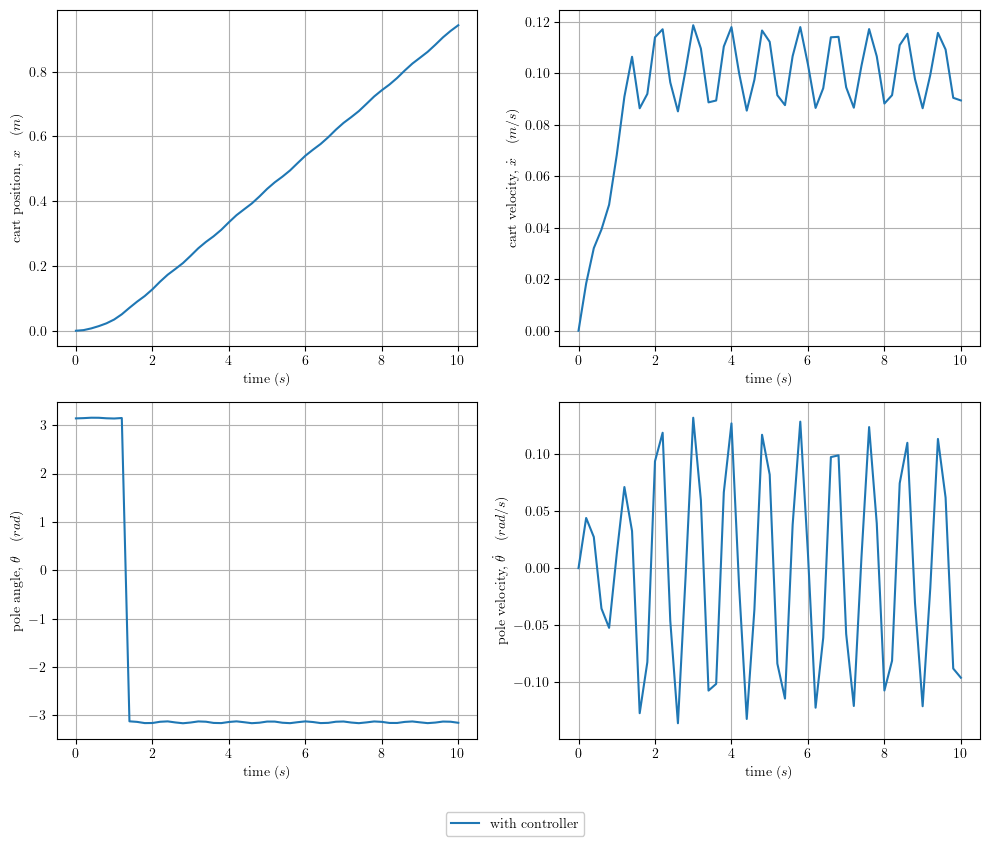

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

s0 = np.array([0, 0, np.pi, 0, 0])
x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

In [ ]:
# Start by studying system without controller but apply an initial force

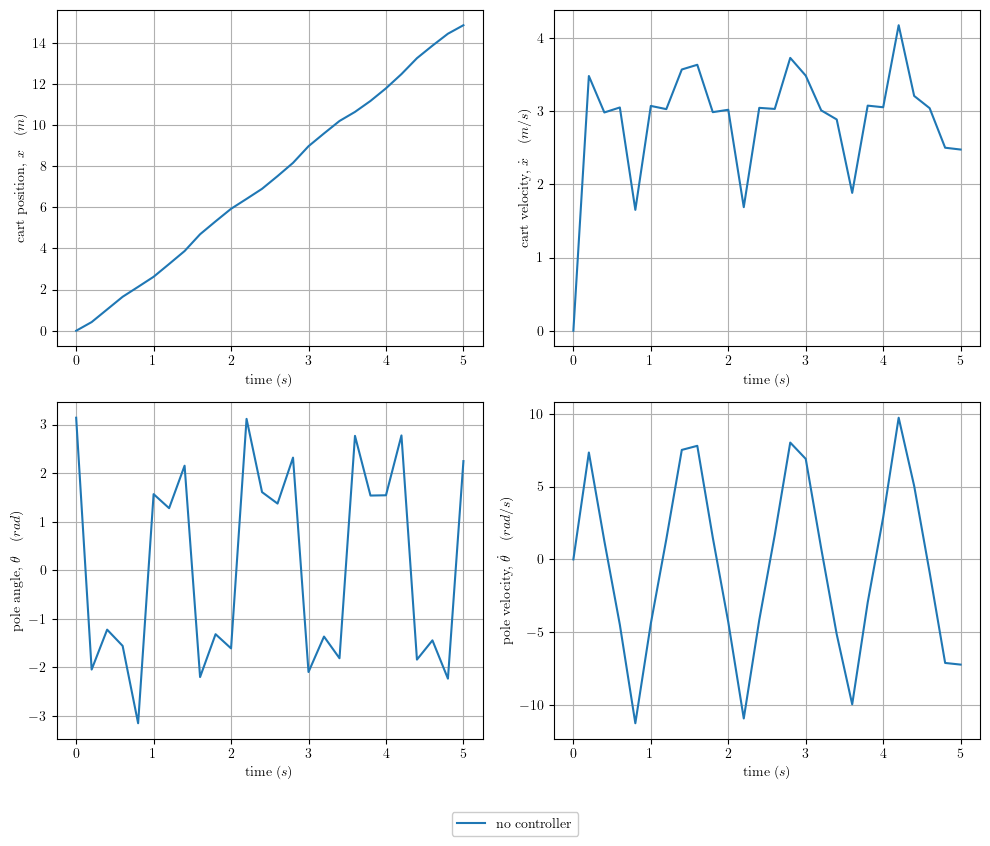

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

s0 = np.array([0, 0, np.pi, 0, 20])
x, y = target.simulate(state=s0, remap=True, time=5)

plot_rollout(x, y, axs, fig, label='no controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

In [43]:
# Clearly, the model is unable to swing the pendulum towards the upright position
# even with the maximum force applied (20 N) at the start

In [ ]:
# Here we exeperiment with manual application of force to get a gist of whats happening

[ 3.14159265 -2.19482194 -1.59078198 -2.15383956  1.84127673 -0.26605577
  2.92182441  0.14591204 -1.55500817  2.67059269  2.17865155  2.67012333
  2.64901041 -2.92373724 -1.44670475 -0.78253571 -0.04940523  0.51623917
  0.40323649  1.04776671 -3.11013166 -1.03167847 -0.46913651 -0.70988245
 -0.82528086 -1.81749337  2.64417706  1.67750123  1.70292363 -3.02528576
 -0.80367518  1.40667903 -1.93153589 -0.56768065 -1.06367814 -3.11161457
  0.41062309 -2.41896147  1.13388612  0.08099805  0.93442481 -3.02873689
 -0.8442225   0.68141569  2.69864051 -1.18243006  0.27992487  1.93280037
 -1.77495265 -0.23491528  1.11972538]


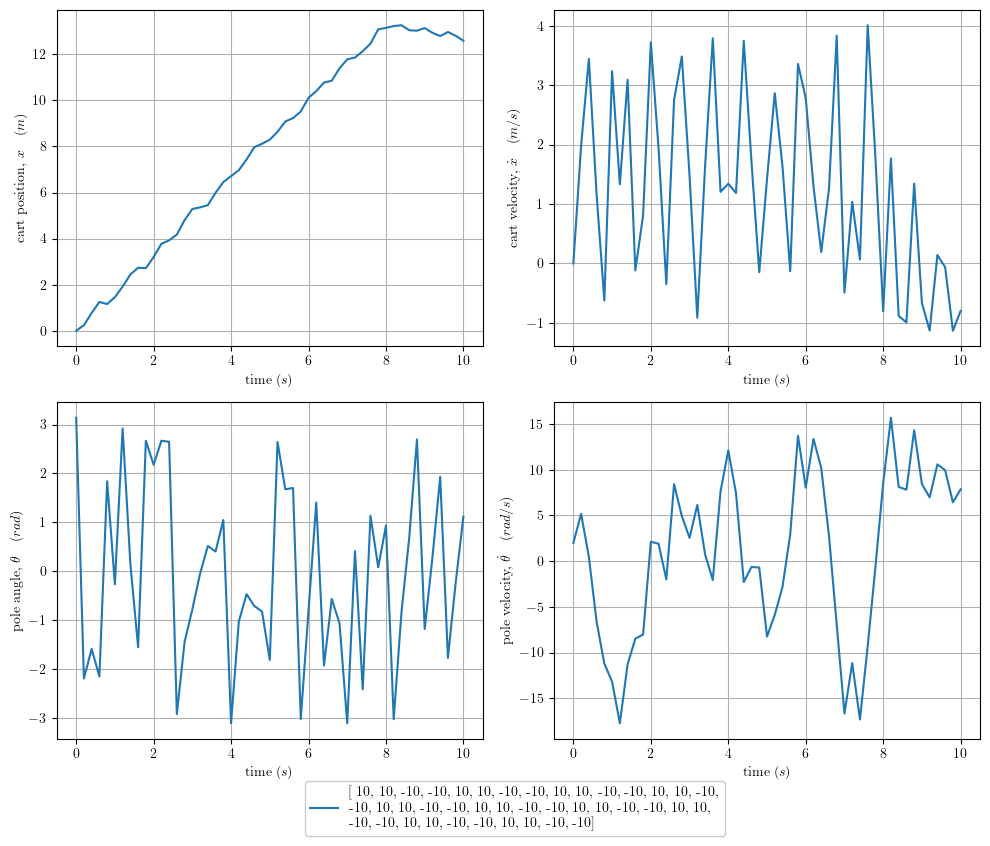

In [32]:
from shared import np_to_string

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

s0 = np.array([0, 0, np.pi, 2, 0])
action_seq = np.array([20] * 10)
action_seq2 = np.array([10, 10, -10, -10] * 10)

x, y = target.simulate_with_action(state=s0, action_seq=action_seq, remap=True, time=10)
x2, y2 = target.simulate_with_action(state=s0, action_seq=action_seq2, remap=True, time=10)

# plot_rollout(x, y, axs, fig, label=np_to_string(action_seq))
plot_rollout(x2, y2, axs, fig, label=np_to_string(action_seq2))
print(y2[:, 2])

fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

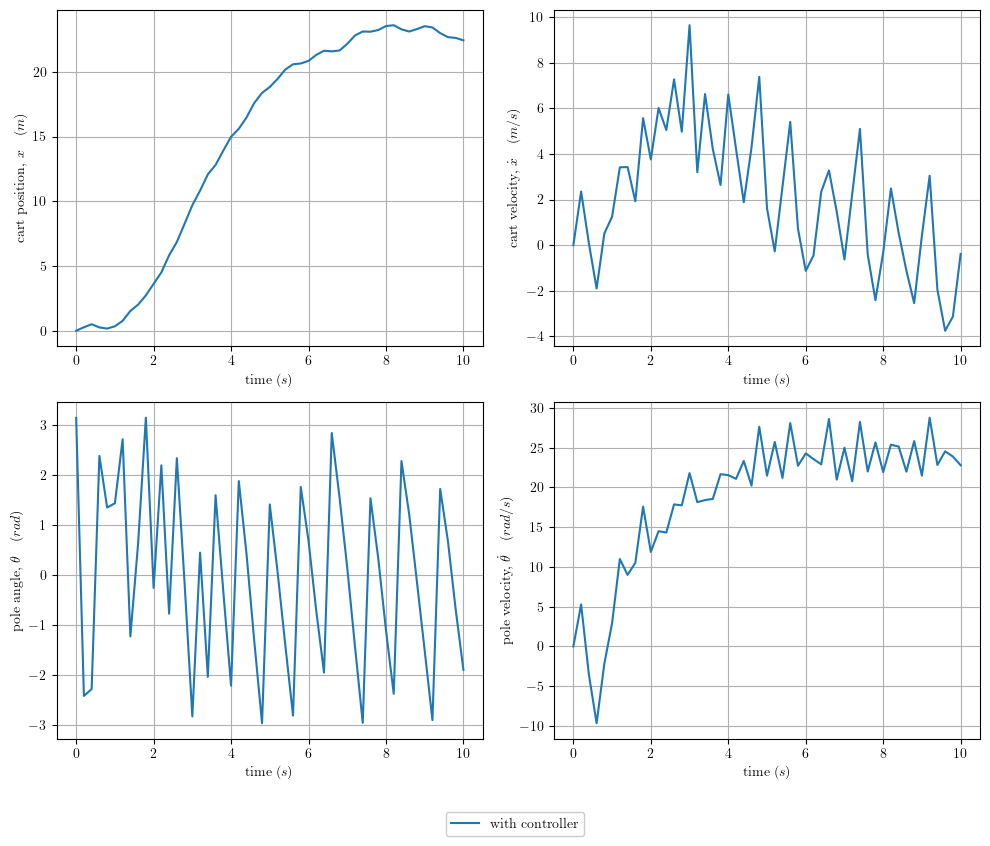

In [10]:
from NonLinearController_ import OscillatingController2

osc_controller2 = OscillatingController2()

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

s0 = np.array([0, 0, np.pi, 0, 0])
x, y = target.simulate_with_feedback(state=s0, remap=True, controller=osc_controller2, time=10)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)


In [11]:
[1.06607997,  0.90819568,  1.68756197,  1.70688629]
y[0:10]


array([[ 0.        ,  0.        ,  3.14159265,  0.        ],
       [ 0.27075419,  2.35163659, -2.42495233,  5.27821928],
       [ 0.50185385,  0.08799505, -2.28824236, -3.52303097],
       [ 0.25546746, -1.90060153,  2.38062208, -9.66836432],
       [ 0.16818774,  0.51610693,  1.34676439, -2.15780741],
       [ 0.34395644,  1.24783025,  1.43247604,  2.94037778],
       [ 0.76576535,  3.41165109,  2.71398197, 10.98451494],
       [ 1.53438981,  3.42327665, -1.23238411,  8.99645688],
       [ 2.01906576,  1.9224801 ,  0.63026986, 10.52242582],
       [ 2.73200047,  5.56495142,  3.1450305 , 17.58237897]])

In [510]:
s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
print(np_to_string(y[28:35]))


[[-32.33,  -5.06,  -0.56, -10.26],
 [-33.61,  -8.21,  -3.00, -16.92],
 [-34.93,  -5.21,   0.76,  -9.89],
 [-35.94,  -5.63,  -1.22, -10.20],
 [-37.37,  -7.25,   2.31, -13.86],
 [-38.51,  -4.87,   0.22,  -9.44],
 [-39.56,  -6.18,  -1.72, -11.05]]


[autoreload of NonLinearController_ failed: Traceback (most recent call last):
  File "/Users/chongzhenyuen/miniforge3/envs/dev/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/chongzhenyuen/miniforge3/envs/dev/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/chongzhenyuen/miniforge3/envs/dev/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/Users/chongzhenyuen/miniforge3/envs/dev/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 361, in update_class
    update_instances(old, new)
  File "/Users/chongzhenyuen/miniforge3/envs/dev/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 315, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]


In [66]:
from scipy.stats import qmc, linregress
from shared import(
    POS_LOW,
    POS_HIGH,
    VEL_LOW,
    VEL_HIGH,
    ANG_VEL_LOW,
    ANG_VEL_HIGH,
    ANG_LOW,
    ANG_HIGH,
    FORCE_LOW,
    FORCE_HIGH,
    SEED,
)

def get_sobol_starting_points():
    sampler = qmc.Sobol(
        d=5,
        seed=SEED,
    )

    X = sampler.random_base2(4)
    X[:, 0] = X[:, 0] * (POS_HIGH - POS_LOW) + POS_LOW
    X[:, 1] = X[:, 1] * (VEL_HIGH - VEL_LOW) + VEL_LOW
    X[:, 2] = X[:, 2] * (ANG_HIGH - ANG_LOW) + ANG_LOW
    X[:, 3] = X[:, 3] * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW
    X[:, 4] = X[:, 4] * (FORCE_HIGH - FORCE_LOW) + FORCE_LOW
    
    return X

starting_points = get_sobol_starting_points()

    
        

In [73]:
from NonLinearController_ import OscillatingController

osc_controller = OscillatingController()

# fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

reached
for s0 in starting_points:
    x, y = target.simulate_with_feedback(state=s0, remap=True, controller=osc_controller, time=10)
    for i, a in enumerate( y[:, 2]):
        if np.abs(a) < 0.5:
            print(f'initial: {s0}')
            print(f'time to reach: {i * 0.2}, reach: {a}')
            break

#     plot_rollout(x, y, axs, fig, label=f'initial: {s0}')
# fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)


initial: [ 9.74199032  6.04785066 -3.06948853 -9.72675674  9.89893634]
time to reach: 2.0, reach: 0.1305898137235056
initial: [-5.24495466 -9.04568831  2.53408209  7.09486141 -7.86612265]
time to reach: 0.4, reach: -0.12033277435522619
initial: [-4.3778123   1.02171823 -0.62566482 -7.36615917 -3.62908769]
time to reach: 0.8, reach: -0.3231203956344764
initial: [ 0.59358601 -4.03885713  0.08105299  9.52927404  1.12088442]
time to reach: 0.0, reach: 0.08105298788514181
initial: [ 4.66324704  2.77725998  2.1319811  12.03351444  5.42841009]
time to reach: 2.2, reach: 0.0920341101373881
initial: [-0.3224566  -2.27965238 -1.88812549 -1.07163819 -6.70431037]
time to reach: 1.8, reach: 0.060425301854631464
initial: [ -9.92530581   7.80972622   1.24399553   1.34236213 -11.82030276]
time to reach: 0.6000000000000001, reach: -0.06585829213667886
initial: [  5.04733428  -7.29235737  -0.99707346 -11.8354616   13.56197926]
time to reach: 3.0, reach: 0.21062496957486054
initial: [  6.27576359   2.493

In [ ]:
# Start over

[6. 6. 6. 6. 6. 6. 6. 6.]
[0.45720556 0.55020729 4.84323206 0.75514454]
Optimized: [6. 6. 6. 6. 6. 6. 6. 6.]


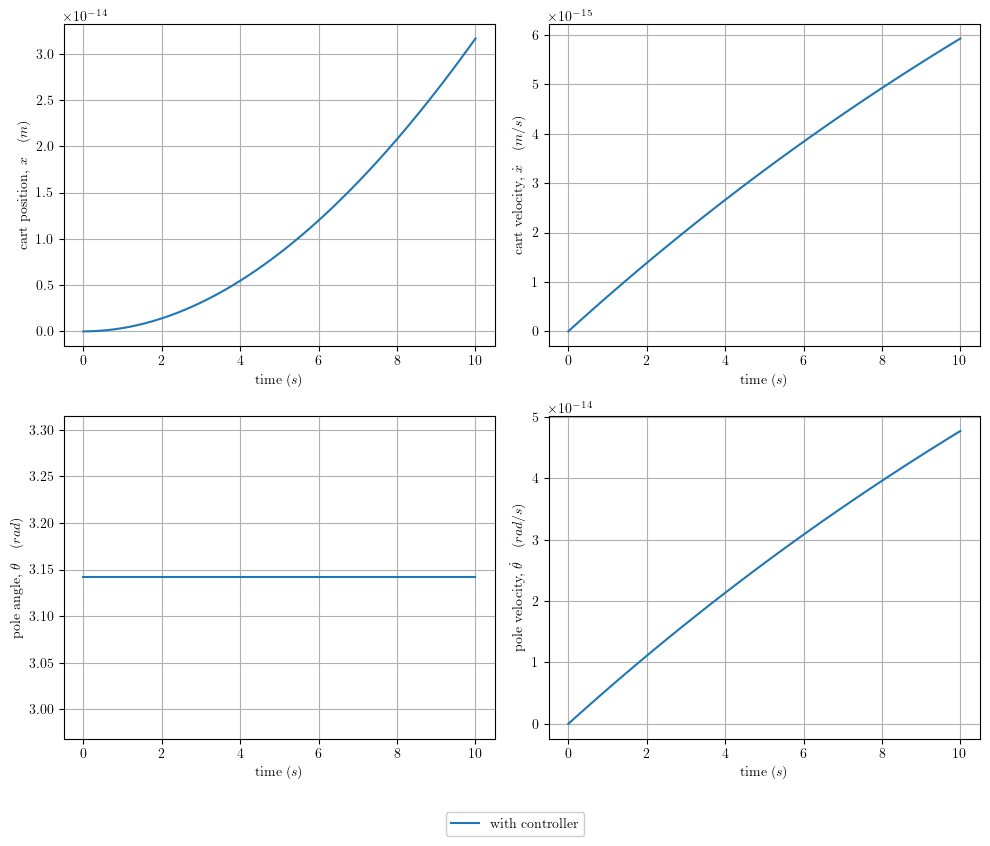

In [430]:
# from optimizer import Optimizer

# optimizer = Optimizer()


# controller = NonLinearController.get_non_linear_controller(m=3)
# print(controller.omega)
# print(controller.w)

# s0 = np.array([0., 0., np.pi, 0., 0.])
# goal = np.array([0., 0., np.pi * 0.75, 0., 0.])
# omega0 = controller.omega

# omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega0, verbose=False, loss_func=3, time=10, remap=True, target=goal)
# controller.omega = omega_opt 
# print("Optimized:", controller.omega)

# fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

# x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

# plot_rollout(x, y, axs, fig, label='with controller')
# fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

In [ ]:
# Changing the basis functions to be nearer to 0.1 causes the omega to explode
#         xi[:, 0] = xi[:, 0] * 0.1
#         xi[:, 1] = xi[:, 1] * 0.1
#         xi[:, 2] = xi[:, 2] * np.pi
#         xi[:, 3] = xi[:, 3] * 0.1

Optimized: [ 0.68,  0.49,  0.61, -0.73, -0.56,  0.06,  1.12,  0.11]


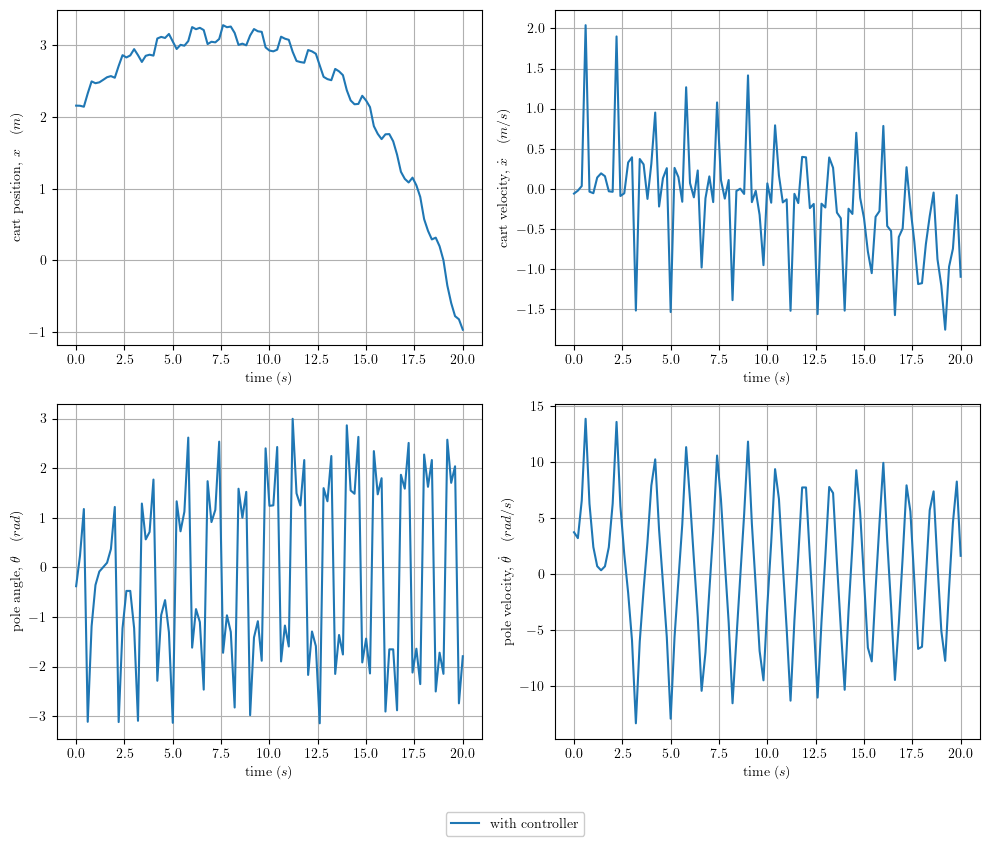

In [480]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)


# s0 = np.array([ 0, 0, np.pi, 0, 0.])
# s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
s0 =np.array([2.16, -0.06, -0.38,  3.73, 0])

goal = np.array([0., 1., 0, 1])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * np.pi * 0.25
temp[:, 0] = temp[:, 0] * 0
# temp[:, 1] = temp[:, 1] * 20 - 10
# temp[:, 3] = temp[:, 3] * 20 - 10

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 6
# omega = controller.omega = np.ones(controller.xi.shape[0]) 
omega = controller.omega = np.array([ 48.41, -79.56, -33.65, -13.23,  88.66, -23.65, 144.31, -16.25]) / 200


controller.w = np.array([ 1.5,  2.20082917, 19.37292826,  3.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=20, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)


Optimized: [ 18.99,  42.12,  16.65,  -2.14,   7.87, -43.85,  30.29,  21.11]


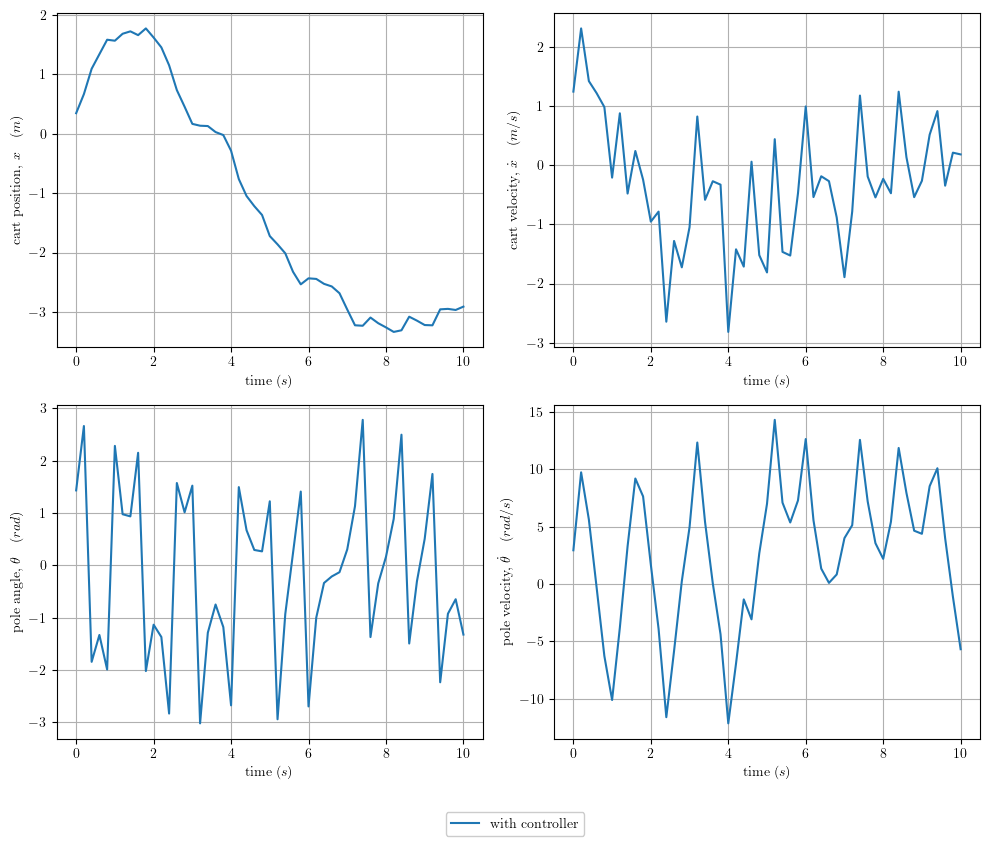

In [51]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)


# s0 = np.array([ 0, 0, np.pi, 0, 0.])
# s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
s0 =np.array([0.34395644,  1.24783025,  1.43247604,  2.94037778, 0])

goal = np.array([ 0, 0, 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * 0
# temp[:, 0] = temp[:, 0] * 2 - 1
# temp[:, 1] = temp[:, 1] * 4 - 2
# temp[:, 3] = temp[:, 3] * 4 - 2

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 6
omega = controller.omega = np.ones(controller.xi.shape[0]) * 10
# omega = controller.omega = np.array([ 48.41, -79.56, -33.65, -13.23,  88.66, -23.65, 144.31, -16.25]) / 10


controller.w = np.array([ 5.82882224,  2.20082917, 19.37292826,  2.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=4, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

Optimized: [ 32.67,  71.91,  16.48,  -2.99,  12.65, -33.94,  13.91,  -8.85]


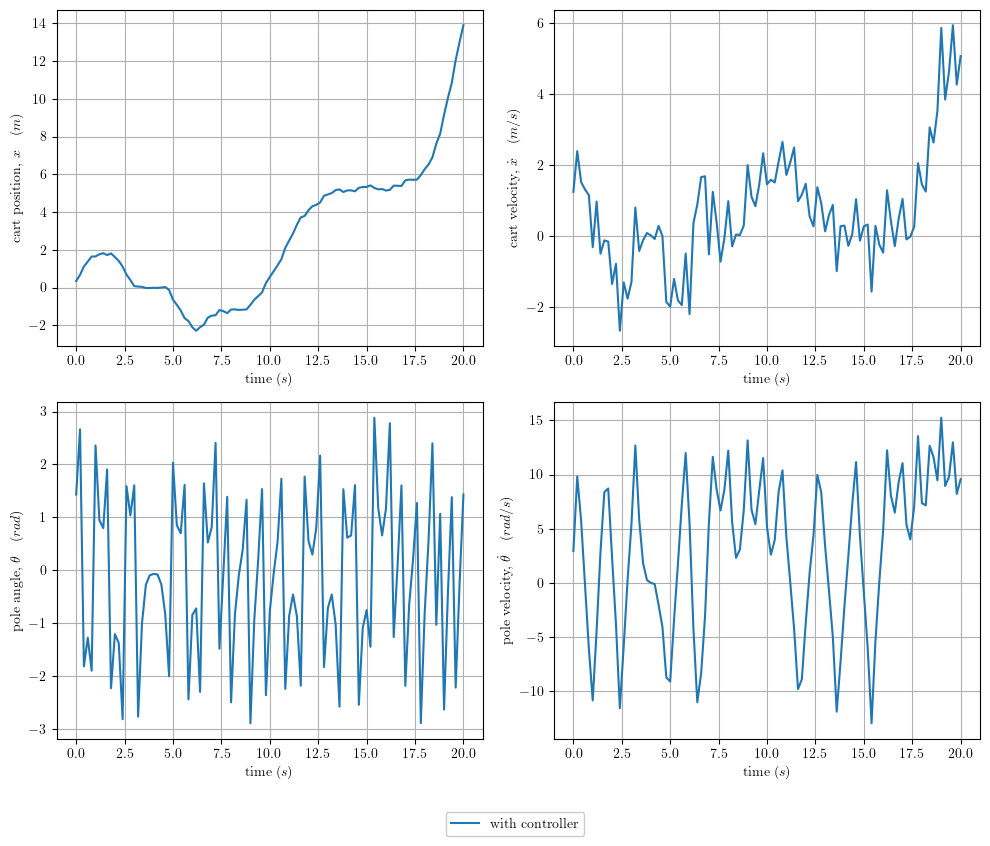

In [3]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)


# s0 = np.array([ 0, 0, np.pi, 0, 0.])
# s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
s0 =np.array([0.34395644,  1.24783025,  1.43247604,  2.94037778, 0])

goal = np.array([ 0, 0, 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * 0
# temp[:, 0] = temp[:, 0] * 2 - 1
# temp[:, 1] = temp[:, 1] * 4 - 2
# temp[:, 3] = temp[:, 3] * 4 - 2

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 6
# omega = controller.omega = np.ones(controller.xi.shape[0]) * 10
omega = controller.omega = np.array([ 18.99,  42.12,  16.65,  -2.14,   7.87, -43.85,  30.29,  21.11])


controller.w = np.array([ 5.82882224,  2.20082917, 19.37292826,  2.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=4, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from CartPole_ import CartPole
from CartPoleNoise_ import CartPoleGaussianNoisyDyn, CartPoleGaussianNoisyObs, CartPoleGaussianNoisyObsDyn

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'image.cmap':'jet'
})

from NonLinearObserver_ import NonLinearObserver
from NonLinearController_ import NonLinearController

from shared import get_initial_states, plot_rollout, np_to_string, get_scan_states_ranges, plot_actual_and_predicted_states_contour

target = CartPole(False)


Optimized: [136.48,  92.04,  12.81,  -2.46,   4.84, -19.66,  28.66,   0.55]


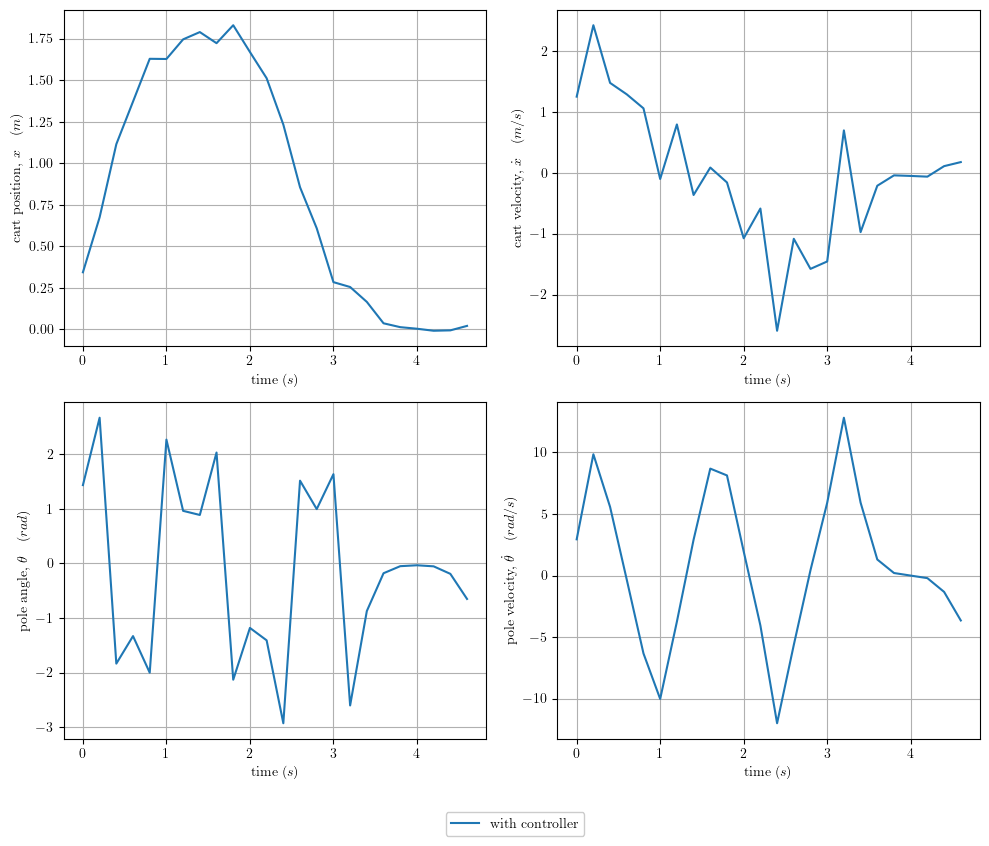

In [24]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)


# s0 = np.array([ 0, 0, np.pi, 0, 0.])
# s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
s0 =np.array([0.34395644,  1.24783025,  1.43247604,  2.94037778, 0])

goal = np.array([ 0, 0, 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * 0
# temp[:, 0] = temp[:, 0] * 2 - 1
# temp[:, 1] = temp[:, 1] * 4 - 2
# temp[:, 3] = temp[:, 3] * 4 - 2

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 6
# omega = controller.omega = np.ones(controller.xi.shape[0]) * 10
omega = controller.omega = np.array([ 32.67,  71.91,  16.48,  -2.99,  12.65, -33.94,  13.91,  -8.8])


controller.w = np.array([ 5.82882224,  2.20082917, 19.37292826,  2.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=4, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=4.5)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

In [26]:
y[:20]

array([[  0.34395644,   1.24783025,   1.43247604,   2.94037778],
       [  0.6746523 ,   2.41996084,   2.66686033,   9.85231087],
       [  1.11459827,   1.47353523,  -1.83602913,   5.57458657],
       [  1.37096974,   1.28543477,  -1.33208644,  -0.34429327],
       [  1.6282624 ,   1.05590918,  -2.00199842,  -6.33326477],
       [  1.62716129,  -0.10338059,   2.26566795, -10.0313535 ],
       [  1.74523201,   0.79159679,   0.96144251,  -3.75427411],
       [  1.78902798,  -0.36590475,   0.88610537,   2.90996809],
       [  1.72232168,   0.08435855,   2.02903494,   8.6865818 ],
       [  1.83032707,  -0.16058678,  -2.13091914,   8.13243786],
       [  1.66929247,  -1.0760034 ,  -1.18227665,   1.95917641],
       [  1.51151415,  -0.58839921,  -1.40944889,  -4.05921539],
       [  1.23245319,  -2.59398602,  -2.92807404, -12.00543279],
       [  0.85567338,  -1.08499572,   1.51413197,  -5.64348041],
       [  0.60858881,  -1.57851771,   0.99339187,   0.43576094],
       [  0.28465027,  -1

In [618]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)


# s0 = np.array([ 0, 0, np.pi, 0, 0.])
# s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
s0 =np.array([0.34395644,  1.24783025,  1.43247604,  2.94037778, 0])

goal = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629])

temp = controller.xi[...]
temp[:, 2] = np.ones_like(temp[:, 2]) * 0
temp[:, 0] = temp[:, 0] * 2 - 1
temp[:, 1] = temp[:, 1] * 1 - 0.5
temp[:, 3] = temp[:, 3] * 1 - 0.5

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 6
# omega = controller.omega = np.ones(controller.xi.shape[0]) * 4
omega = controller.omega = np.array([4.18, 3.83, 5.07, 4.45, 4.67, 3.43, 3.88, 2.75])


controller.w = np.array([ 4.82882224,  2.20082917, 19.37292826,  2.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=5, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x, y, axs, fig, label='with controller')


In [15]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)


# s0 = np.array([ 0, 0, np.pi, 0, 0.])
# s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
s0 =np.array([0.34395644,  1.24783025,  1.43247604,  2.94037778, 0])

goal = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629])

temp = controller.xi[...]
temp[:, 2] = np.ones_like(temp[:, 2]) * 0
temp[:, 0] = temp[:, 0] * 2 - 1
temp[:, 1] = temp[:, 1] * 1 - 0.5
temp[:, 3] = temp[:, 3] * 1 - 0.5

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 6
# omega = controller.omega = np.ones(controller.xi.shape[0]) * 4
omega = controller.omega = np.array([4.18, 3.83, 5.07, 4.45, 4.67, 3.43, 3.88, 2.75])


controller.w = np.array([ 3.82882224,  2.20082917, 19.37292826,  2.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=5, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x, y, axs, fig, label='with controller')


In [573]:
y

array([[  0.34395644,   1.24783025,   1.43247604,   2.94037778],
       [  0.66887607,   2.35731554,   2.6638971 ,   9.78203922],
       [  1.10224481,   1.45806829,  -1.83486198,   5.63730972],
       [  1.35478061,   1.26708229,  -1.31814317,  -0.27736057],
       [  1.60123971,   0.9736574 ,  -1.96994479,  -6.23670845],
       [  1.65978537,   0.36684027,   2.46483082,  -8.94119919],
       [  1.78532855,   0.53313168,   1.30523195,  -2.82442801],
       [  1.87346791,   0.35169787,   1.32330015,   2.88815844],
       [  2.00943587,   1.38913635,   2.52619576,   9.58769756],
       [  2.28467486,   0.64059681,  -1.86114717,   6.28369813],
       [  2.36211024,   0.37971052,  -1.21680819,   0.38939141],
       [  2.44810289,   0.30662319,  -1.7259029 ,  -5.39340835],
       [  2.36323112,  -0.82808259,   2.78171073, -10.58004736],
       [  2.33141795,   0.14392971,   1.38077716,  -3.8997079 ],
       [  2.35035366,  -0.02691183,   1.17780591,   1.76690175],
       [  2.36977421,   0

In [ ]:
2.36148102,  -0.18079452,  -1.10601221,  -1.30898938

Optimized: [ 46.39, -81.40, -36.93, -14.52,  89.85, -26.80, 131.81, -16.88]


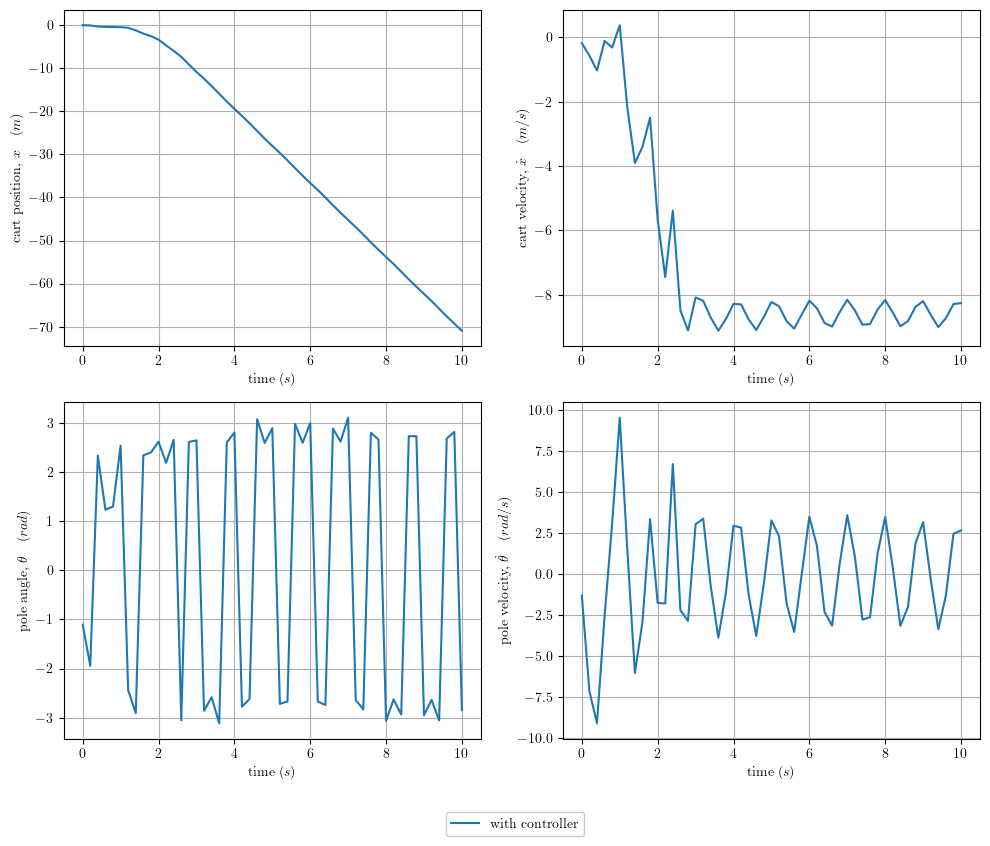

In [581]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)

s0 = np.array([ 0,  -0.18079452,  -1.10601221,  -1.30898938, 0.])
goal = np.array([0., 0., 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * np.pi * 0.25
# temp[:, 0] = temp[:, 0] * 0.75
# temp[:, 1] = temp[:, 1] * 20 - 10
# temp[:, 3] = temp[:, 3] * 20 - 10

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 0.5
omega = controller.omega = np.array([ 46.39, -81.40, -35.17, -14.52,  89.85, -26.80, 131.81, -16.88])

controller.w = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=10, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)



Optimized: [ 47.88, -77.66, -33.55, -14.37,  91.68, -25.62, 146.68, -17.01]


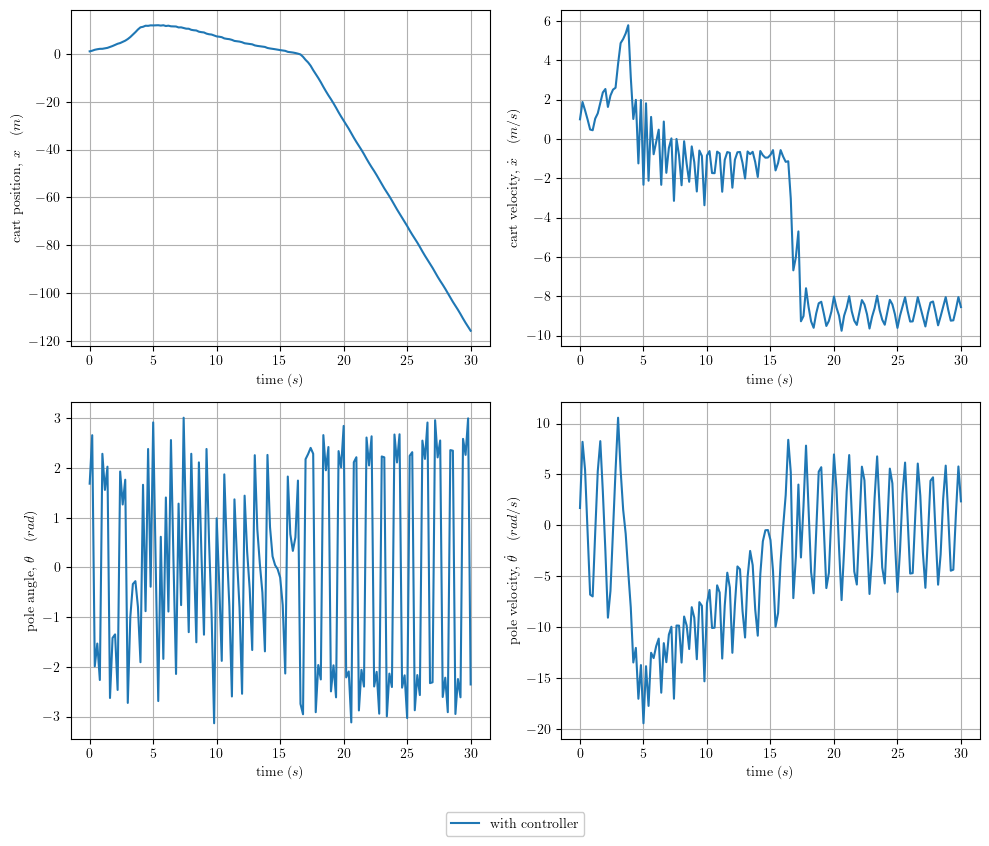

In [495]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)

s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
goal = np.array([0., 0., 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * np.pi * 0.25
# temp[:, 0] = temp[:, 0] * 0.75
# temp[:, 1] = temp[:, 1] * 20 - 10
# temp[:, 3] = temp[:, 3] * 20 - 10

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 0.5
omega = controller.omega = np.array([ 47.86, -77.02, -33.28, -13.91,  90.92, -25.41, 147.66, -16.87])

controller.w = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=20, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)



In [490]:
print(np_to_string(y[5:10]))

[[ 0.11,  0.81, -2.58,  3.92],
 [ 0.16, -0.23, -2.44, -2.34],
 [-0.00, -1.16,  2.82, -6.39],
 [-0.10,  0.02,  2.22,  0.13],
 [ 0.01,  1.19,  2.90,  6.54]]


In [358]:
y[20:30]

array([[ 19.18098032,   4.87201296,  -0.30317376,  -2.12930291],
       [ 20.17682177,   4.97600859,  -1.06643469,  -5.75386531],
       [ 21.03152314,   3.10512153,  -2.83452864, -13.0497887 ],
       [ 21.80274784,   4.82587862,   1.37314177,  -6.75085039],
       [ 22.80150417,   4.93799201,   0.49186682,  -2.36324117],
       [ 23.75344871,   4.59095719,   0.34890342,   0.73915023],
       [ 24.63773028,   4.30416153,   0.84817986,   4.4321517 ],
       [ 25.56762096,   5.44264442,   2.25140298,  10.29612701],
       [ 26.71541969,   4.83633473,  -1.76472714,   8.10981032],
       [ 27.59583758,   4.32005529,  -0.69313428,   3.04240894]])

Optimized: [ 48.41, -79.56, -33.65, -13.23,  88.66, -23.65, 144.31, -16.25]


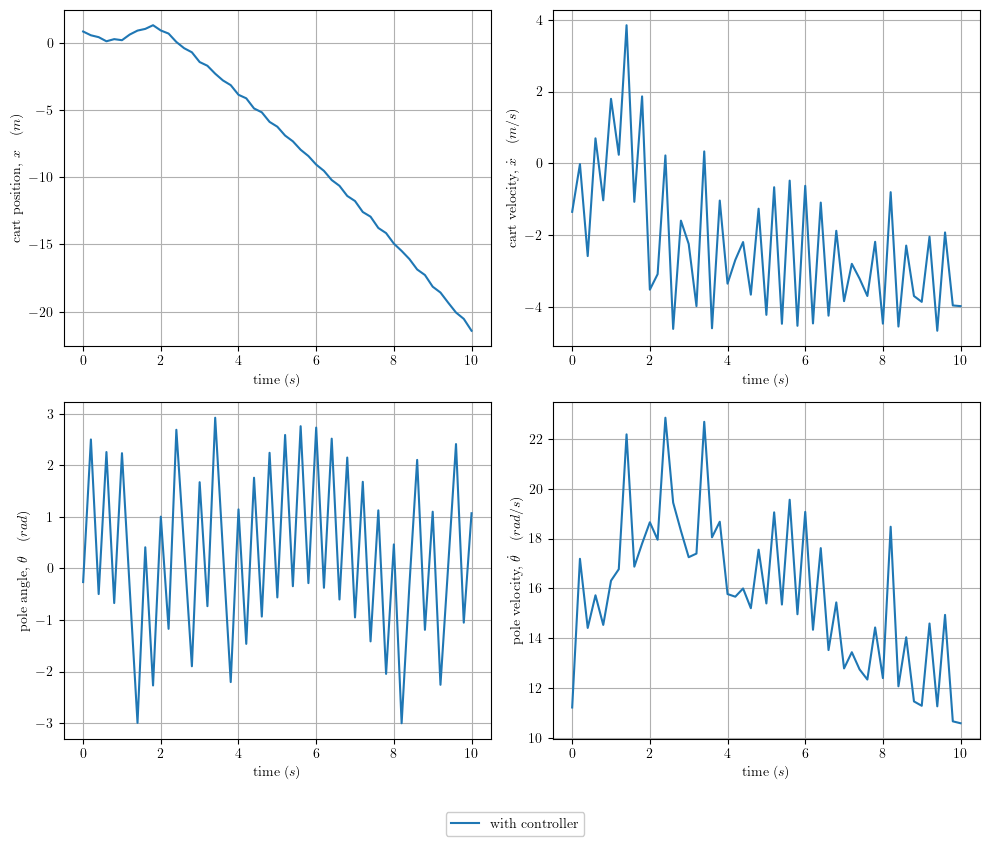

In [362]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)

# s0 = np.array([ 0, 0, np.pi, 0, 0.])
# s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
s0 =np.array([ 8.28264420e-01, -1.35363003e+00, -2.63583043e-01, 1.12147596e+01, 0])

goal = np.array([0., 0., 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * np.pi * 0.25
# temp[:, 0] = temp[:, 0] * 0.75
# temp[:, 1] = temp[:, 1] * 20 - 10
# temp[:, 3] = temp[:, 3] * 20 - 10

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 6
# omega = controller.omega = np.ones(controller.xi.shape[0]) 
omega = controller.omega = np.array([ 48.41, -79.56, -33.65, -13.23,  88.66, -23.65, 144.31, -16.25])


controller.w = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=5, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)



Optimized: [ 49.13, -81.80, -34.60, -13.18,  88.29, -23.35, 140.73, -16.48]


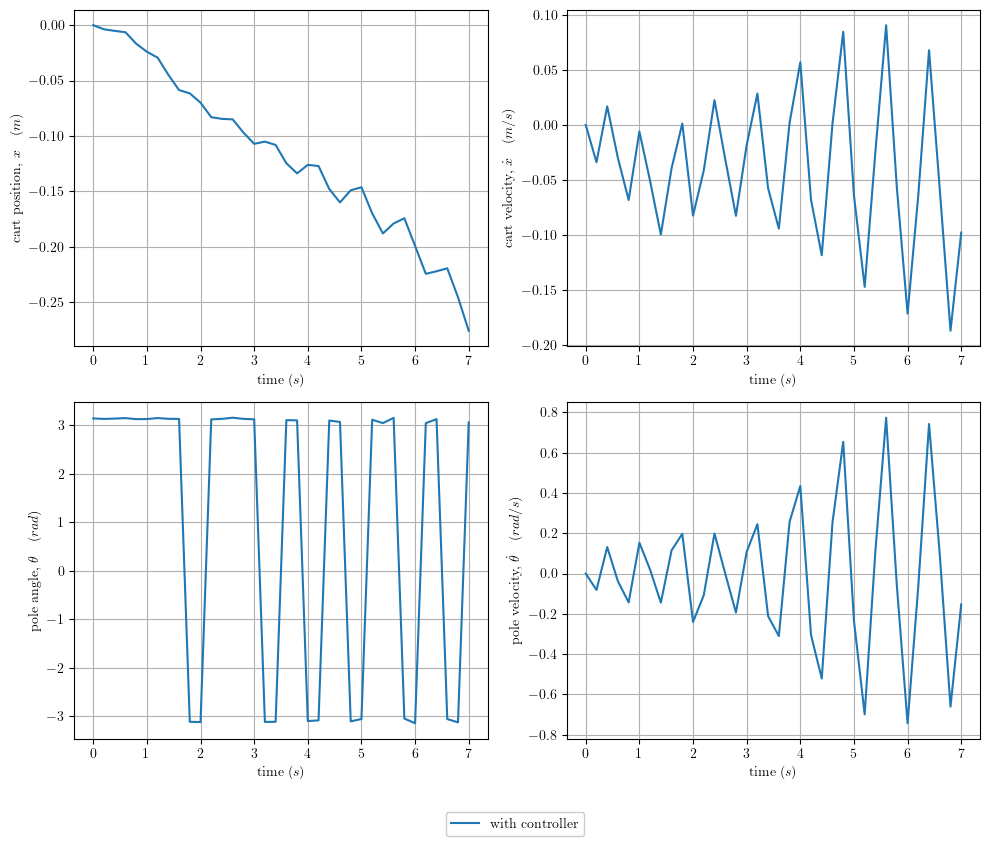

In [340]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)

# s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
s0 = np.array([ 0, 0, np.pi, 0, 0.])

goal = np.array([0., 0., 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * np.pi * 0.25
# temp[:, 0] = temp[:, 0] * 0.75
# temp[:, 1] = temp[:, 1] * 20 - 10
# temp[:, 3] = temp[:, 3] * 20 - 10

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 0.5
omega = controller.omega = np.array([ 48.41, -79.56, -33.65, -13.23,  88.66, -23.65, 144.31, -16.25])

controller.w = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=20, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=7)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)



Optimized: [ 49.09, -75.91, -34.11, -13.44,  89.93, -25.09, 153.96, -16.52]


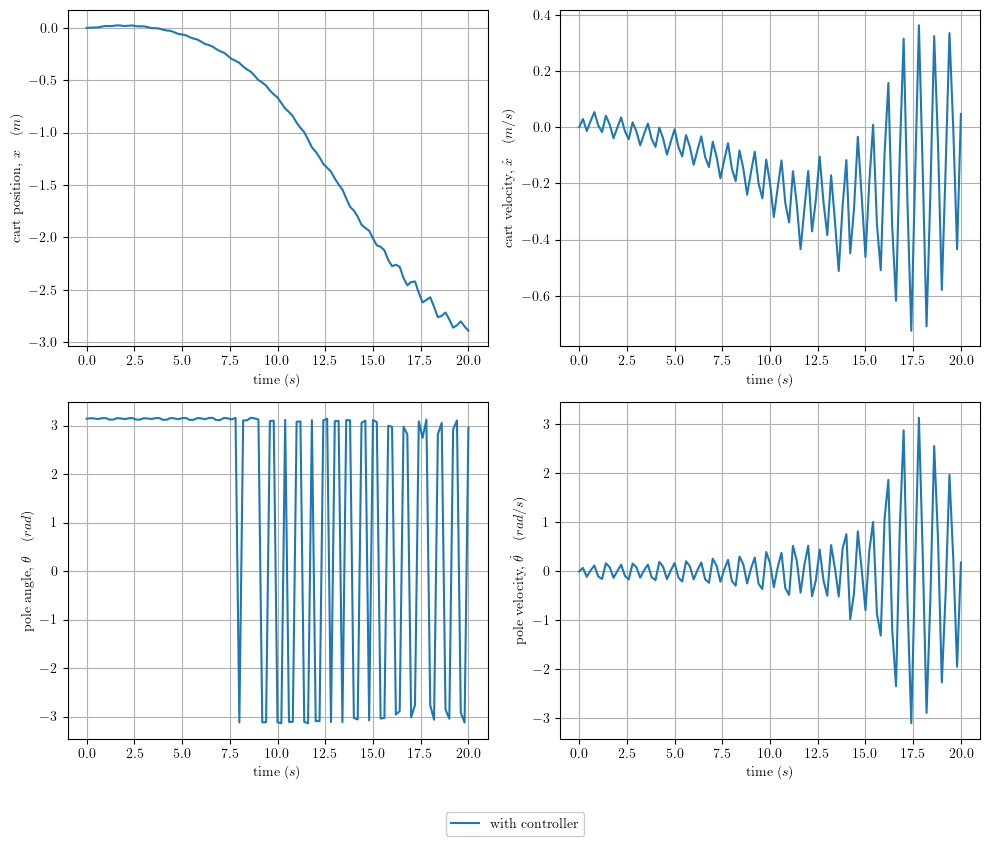

In [335]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)

# s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
s0 = np.array([ 0, 0, np.pi, 0, 0.])
goal = np.array([0., 0., 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * np.pi * 0.25
# temp[:, 0] = temp[:, 0] * 0.75
# temp[:, 1] = temp[:, 1] * 20 - 10
# temp[:, 3] = temp[:, 3] * 20 - 10

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 0.5
omega = controller.omega = np.array([ 49.00, -75.63, -34.05, -13.39,  89.75, -25, 150.11, -16.46])

controller.w = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=20, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)



Optimized: [ 48.23, -77.18, -33.38, -13.74,  92.87, -26.56, 145.98, -16.78]


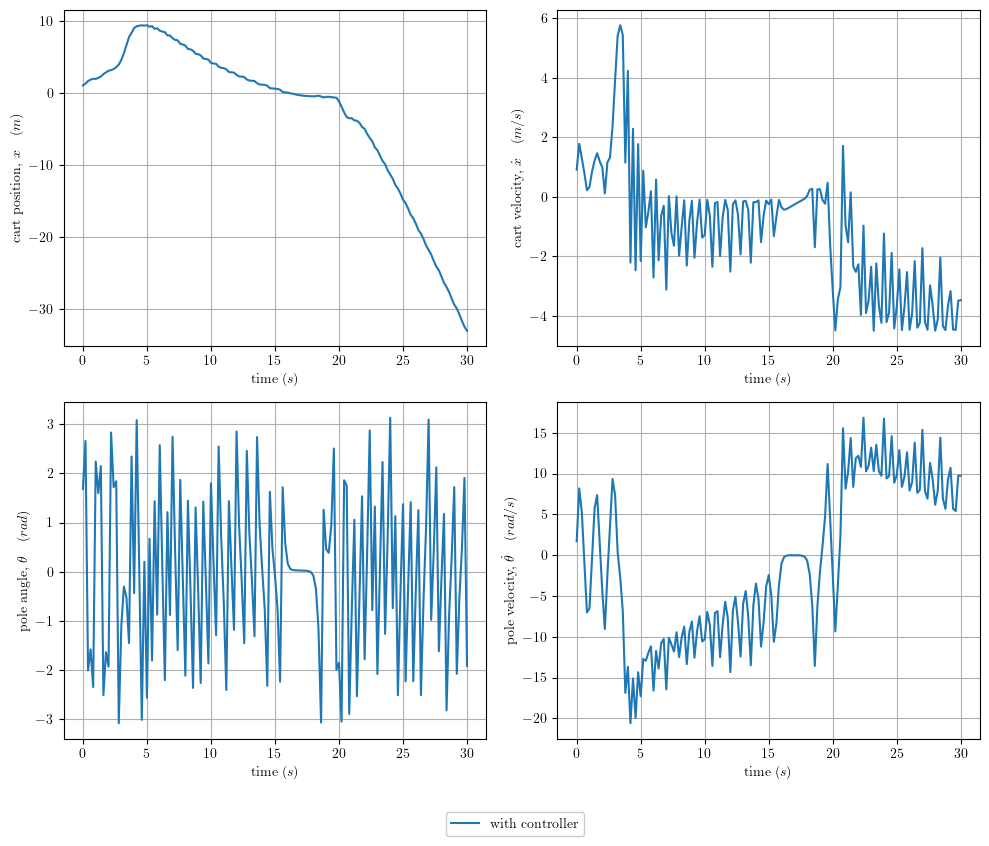

In [287]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)

s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
goal = np.array([0., 0., 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * np.pi * 0.25
# temp[:, 0] = temp[:, 0] * 0.75
# temp[:, 1] = temp[:, 1] * 20 - 10
# temp[:, 3] = temp[:, 3] * 20 - 10

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 0.5
omega = controller.omega = np.array([ 47.86, -77.02, -33.28, -13.91,  90.92, -25.41, 147.66, -16.87])

controller.w = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=20, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)



In [ ]:
# try further optimizing

Optimized: [ 48.14, -77.10, -33.49, -13.75,  92.88, -26.60, 146.08, -16.80]


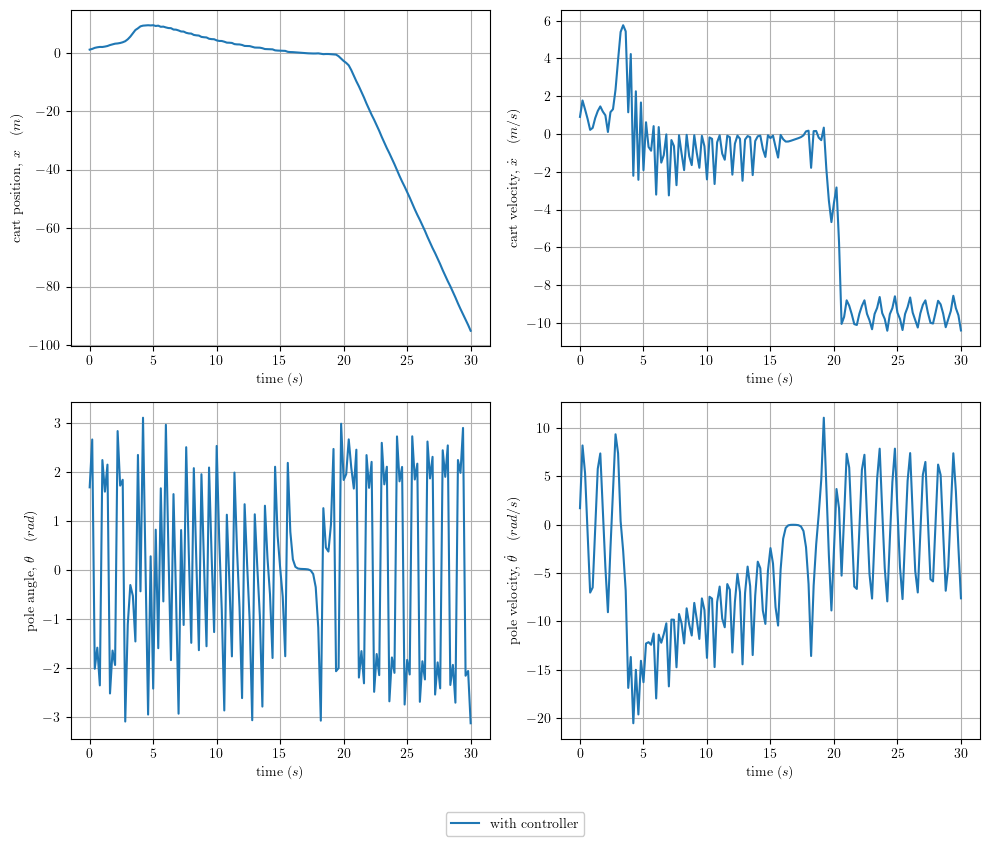

In [314]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)

s0 = np.array([ 1.06607997,  0.90819568,  1.68756197,  1.70688629, 0.])
goal = np.array([0., 0., 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * np.pi * 0.25
# temp[:, 0] = temp[:, 0] * 0.75
# temp[:, 1] = temp[:, 1] * 20 - 10
# temp[:, 3] = temp[:, 3] * 20 - 10

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 0.5
omega = controller.omega = np.array([ 48.23, -77.18, -33.38, -13.74,  92.87, -26.56, 145.98, -16.78])

controller.w = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=20, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)



In [315]:
y[80:90]



array([[ 0.2037375 , -0.2751706 ,  0.21963759, -1.44510162],
       [ 0.13345828, -0.39986212,  0.06654907, -0.32907522],
       [ 0.05311311, -0.39714362,  0.03265819, -0.06740752],
       [-0.02252226, -0.35859897,  0.02550582, -0.01621718],
       [-0.08964708, -0.31313455,  0.02327986, -0.00957986],
       [-0.14759254, -0.26680031,  0.0208944 , -0.01769725],
       [-0.19620393, -0.21912348,  0.01476819, -0.05203981],
       [-0.2346869 , -0.16303037, -0.00558751, -0.17936895],
       [-0.25918895, -0.07042524, -0.07898943, -0.6536932 ],
       [-0.25507393,  0.1409627 , -0.34683752, -2.33043944]])

In [302]:
np.abs(y[80:85]).max(axis=0)

array([0.2037375 , 0.39986212, 0.21963759, 1.44510162])

In [ ]:
# Try second stage

Optimized: [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]


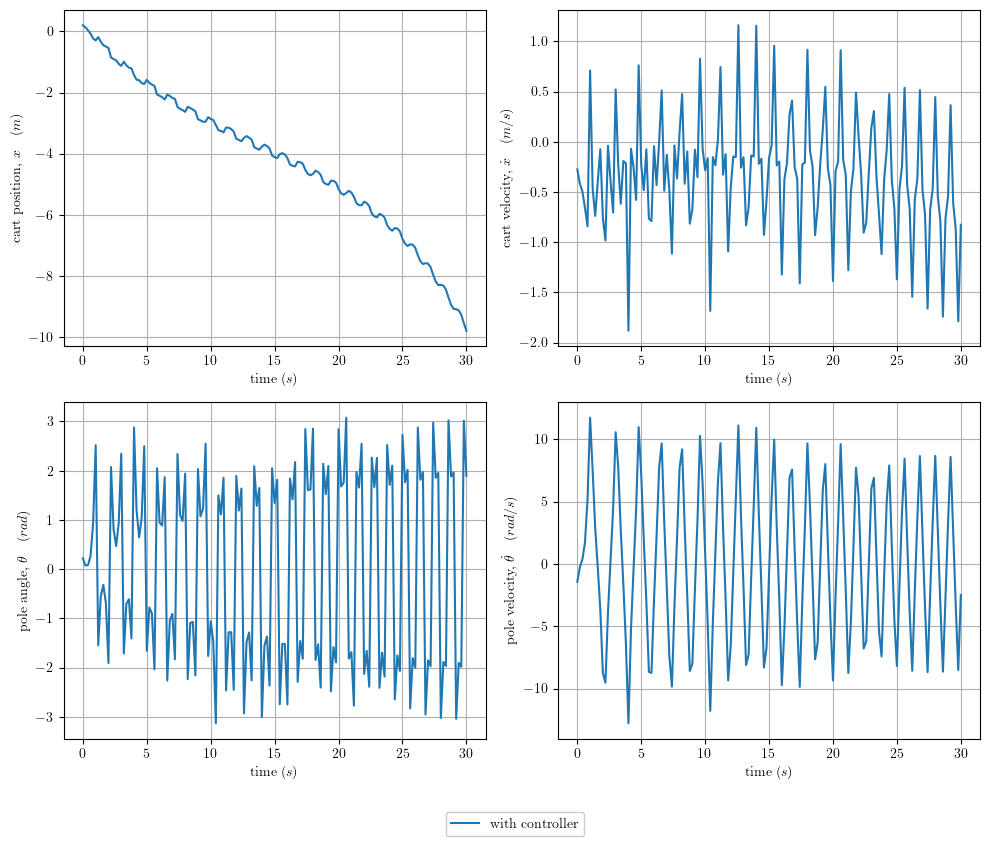

In [309]:
from optimizer import Optimizer

optimizer = Optimizer()


controller = NonLinearController.get_non_linear_controller(m=3)

s0 = np.array([ 0.2037375 , -0.2751706 ,  0.21963759, -1.44510162, 0.])
goal = np.array([0., 0., 0, 0])

temp = controller.xi[...]
# temp[:, 2] = np.ones_like(temp[:, 2]) * np.pi * 0.25
# temp[:, 0] = temp[:, 0] * 0.75
# temp[:, 1] = temp[:, 1] * 20 - 10
# temp[:, 3] = temp[:, 3] * 20 - 10

controller.xi[...] = temp
# controller.w = np.array([ 1, 1, 1, 1]) * 0.5
omega = controller.omega = np.ones_like(controller.omega) * 0.25

controller.w = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

omega_opt, loss = optimizer.optimize_non_linear(target, controller, s0, omega, verbose=False, loss_func=4, time=20, remap=True, target=goal)
controller.omega = omega_opt 
print("Optimized:", np_to_string(controller.omega))

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x, y = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x, y, axs, fig, label='with controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)



In [328]:
from LinearController_ import LinearController

controller = LinearController.get_linear_controller()
controller.get_params()

p0 = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

s0 = np.array([-0.02252226, -0.35859897,  0.02550582, -0.01621718, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)

p_opt, loss

(array([ 0.50848021,  0.88118403, 14.87174717,  2.29760931]),
 1.1657880495934925)

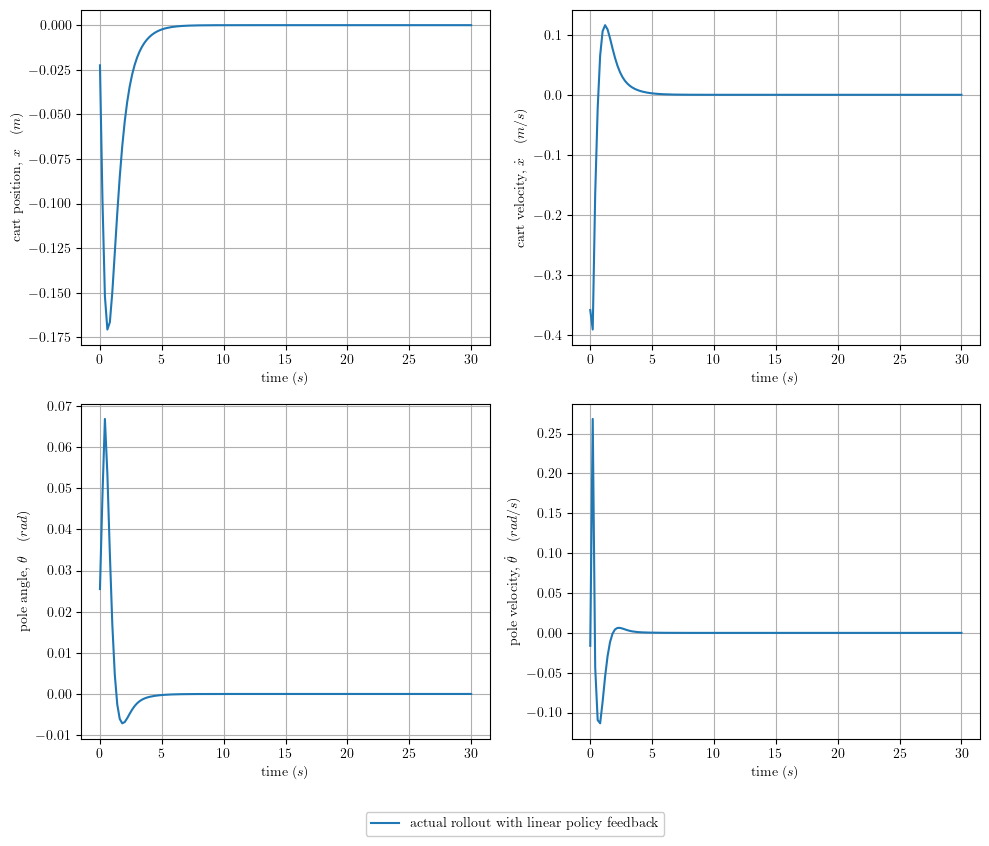

In [329]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
controller.p = p_opt

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

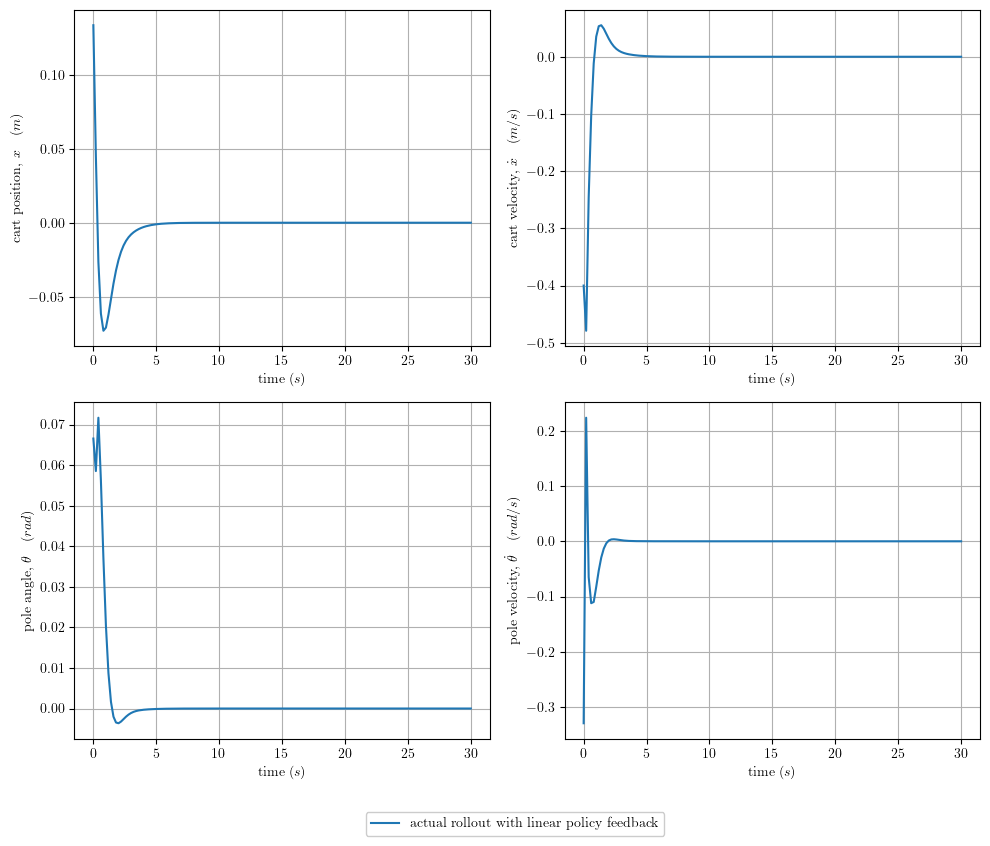

In [332]:
from LinearController_ import LinearController

controller = LinearController.get_linear_controller()
controller.get_params()

p_opt = np.array([ 0.50848021,  0.88118403, 14.87174717,  2.29760931])

s0 = np.array([0.13345828, -0.39986212,  0.06654907, -0.32907522, 0])

# p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
controller.p = p_opt

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

In [ ]:
 2.50,  0.16, -0.11,  0.57

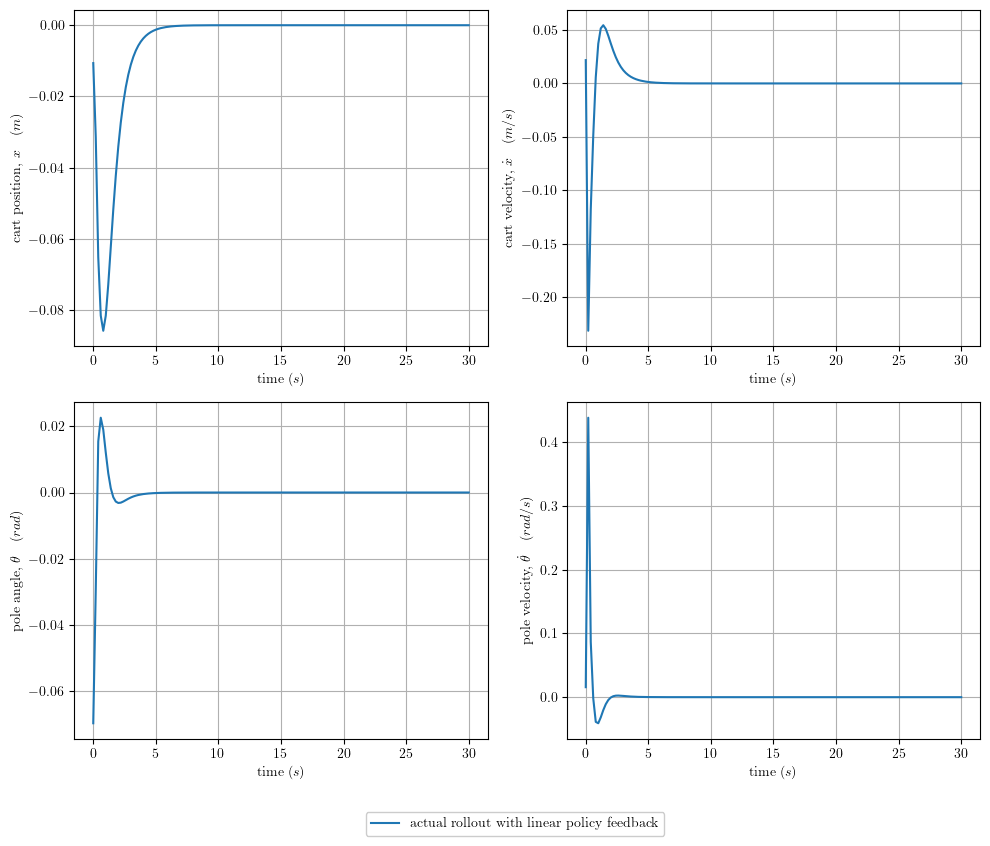

In [56]:
from LinearController_ import LinearController

controller = LinearController.get_linear_controller()
controller.get_params()

p0 = np.array([ 3,  2.20082917, 19.37292826,  3.02057818])

s0 = np.array([-0.01064276,  0.02178444, -0.06973141,  0.01568978, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)

p_opt, loss

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
controller.p = p_opt

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=30)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from CartPole_ import CartPole
from CartPoleNoise_ import CartPoleGaussianNoisyDyn, CartPoleGaussianNoisyObs, CartPoleGaussianNoisyObsDyn

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'image.cmap':'jet'
})

from NonLinearObserver_ import NonLinearObserver
from NonLinearController_ import NonLinearController

from shared import get_initial_states, plot_rollout, np_to_string, get_scan_states_ranges, plot_actual_and_predicted_states_contour

target = CartPole(False)


In [18]:
from NonLinearController_ import EnsembleController, OscillatingController2, NonLinearController
from LinearController_ import LinearController

controller_1 = OscillatingController2()

controller_2 = NonLinearController.get_non_linear_controller(m=3)

controller_3 = LinearController.get_linear_controller()



# Setup paramters
controller_2.omega = np.array([136.48,  92.04,  12.81,  -2.46,   4.84, -19.66,  28.66,   0.55])
controller_2.w = np.array([ 5.82882224,  2.20082917, 19.37292826,  2.02057818])

# Setup paramters
controller_3.p = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

# Setup ensemble
e_controller = EnsembleController([controller_1, controller_2, controller_3])

# Start state
s0 = np.array([0, 0, np.pi+0.0005, 0, 0])


[0.34392095 1.2465257  1.4308096  2.93446155]


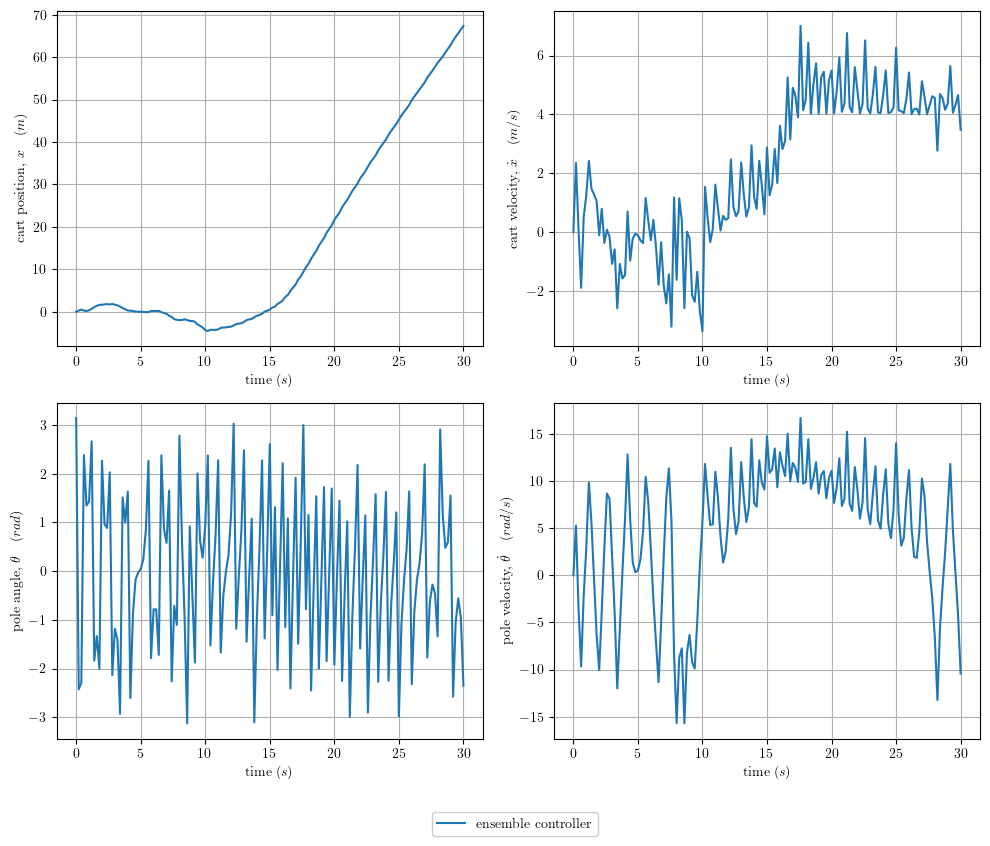

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=e_controller, time=30)

plot_rollout(x_target, y_target, axs, fig, label='ensemble controller')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)